# 0. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

**Evaluation**
<br>**Goal**
<br>It is your job to predict if a customer will churn, given the ~170 columns containing customer behavior, usage patterns, payment patterns, and other features that might be relevant. Your target variable is "churn_probability"

**Metric**
<br>Submissions are evaluated on Classification Accuracy between the value of the predicted value and the actual value of churn for each of the customers.

**Accuracy score formula**

<br>The public leaderboard is going to rank your submission against other users while the competition is active, however, once the competition is ended, the final ranks will be calculated on the private leaderboard.

**Submission file format**
<br>The file should contain a header and have the following format (CSV):

**id,churn_probability**
<br>70005,0.0
<br>70006,1.0
<br>70007,0.0
<br>etc.


# Steps or Summary :
1. Import Necessary Libraries
2. Load the Data and Understanding the Data
    - <i>Segmentation of Columns</i>
    - <i>Missing Value Check</i>
    - <i>Outlier Treatment</i>
3. Exploratory Data Analysis:
    - <i>Univariate Analysis (One Variable at a time)</i>
    - <i>Bivariate Analysis (Two Variable at a time)</i>
    - <i>Multivariate Analysis (More than two Variables at a time)</i>
4. Data Preprocessing and Data Preparation Steps
    - <i>Data Preparation Steps : Dummy Variable Creation (One Hot Encoding)</i>
    - <i>Train-Test Split : Splitting the Data into Training and Testing Sets</i>
    - <i>Feature Scaling : Standard scaling </i>
    - <i> PCA
5. Building the initial model ( Model 0 )
6. Feature Selection : Using RFE and Manual Selection methods
7. Check and Build the models using selected features
8. Residual Analysis of the train data
9. Making Predictions using the final model
10. Steps for Further Model Refinement and Optimization
11. Model Evaluation

# 1. Import Necessary Libraries

In [1]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os
import time

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Statsmodel
import statsmodels as sm

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from sklearn.decomposition import PCA , IncrementalPCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report,roc_auc_score,roc_curve

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import Image
from six import StringIO
import pydotplus,graphviz

# imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

#Six
from six import StringIO  

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Log Start time
notebook_start_time = time.time()

# 2. Load the Data and Understanding the Data

In [3]:
#COMMENT THIS SECTION INCASE RUNNING THIS NOTEBOOK LOCALLY

#Checking the kaggle paths for the uploaded datasets
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [4]:
#INCASE RUNNING THIS LOCALLY, PASS THE RELATIVE PATH OF THE CSV FILES BELOW
#(e.g. if files are in same folder as notebook, simple write "train.csv" as path)

#churn_data = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-63/train.csv")
#churn_data_unseen = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-63/test.csv")
#sample = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-63/sample.csv")
#data_dict = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-63/data_dictionary.csv")

In [5]:
### Load and read data
churn_data = pd.read_csv("train.csv")
churn_data_unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(churn_data.shape)
print(churn_data_unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [6]:
churn_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [7]:
churn_data_unseen.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

### Info of datasets

In [8]:
churn_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [9]:
churn_data_unseen.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

### Basic summary statistics

In [10]:
churn_data.describe(include="all")

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   69999.000000    69999.0         69297.0         69297.0   
unique           NaN        NaN             NaN             NaN   
top              NaN        NaN             NaN             NaN   
freq             NaN        NaN             NaN             NaN   
mean    34999.000000      109.0             0.0             0.0   
std     20207.115084        0.0             0.0             0.0   
min         0.000000      109.0             0.0             0.0   
25%     17499.500000      109.0             0.0             0.0   
50%     34999.000000      109.0             0.0             0.0   
75%     52498.500000      109.0             0.0             0.0   
max     69998.000000      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          69297.0                69999                69600   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                69999                69600   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7  ...   sachet_3g_7  \
count                 69266  69999.000000  69999.000000  ...  69999.000000   
unique                    1           NaN           NaN  ...           NaN   
top               8/31/2014           NaN           NaN  ...           NaN   
freq                  69266           NaN           NaN  ...           NaN   
mean                    NaN    283.134365    278.185912  ...      0.081444   
std                     NaN    334.213918    344.366927  ...      0.634547   
min                     NaN  -2258.709000  -1289.715000  ...      0.000000   
25%                     NaN     93.581000     86.714000  ...      0.000000   
50%                     NaN    197.484000    191.588000  ...      0.000000   
75%                     NaN    370.791000    365.369500  ...      0.000000   
max                     NaN  27731.088000  35145.834000  ...     33.000000   

         sachet_3g_8     fb_user_6     fb_user_7     fb_user_8           aon  \
count   69999.000000  17568.000000  17865.000000  18417.000000  69999.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.085487      0.916325      0.909544      0.890319   1220.639709   
std         0.680035      0.276907      0.286842      0.312501    952.426321   
min         0.000000      0.000000      0.000000      0.000000    180.000000   
25%         0.000000      1.000000      1.000000      1.000000    468.000000   
50%         0.000000      1.000000      1.000000      1.000000    868.000000   
75%         0.000000      1.000000      1.000000      1.000000   1813.000000   
max        41.000000      1.000000      1.000000      1.000000   4337.000000   

          aug_vbc_3g    jul_vbc_3g   jun_vbc_3g  churn_probability  
count   69999.000000  69999.000000  69999.00000       69999.000000  
unique           NaN           NaN          NaN                NaN  
top              NaN           NaN          NaN                NaN  
freq             NaN           NaN          NaN                NaN  
mean       68.108597     65.935830     60.07674           0.101887  
std       269.328659    267.899034    257.22681           0.302502  
min         0.0

In [11]:
churn_data_unseen.describe(include="all")

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   30000.000000    30000.0         29684.0         29684.0   
unique           NaN        NaN             NaN             NaN   
top              NaN        NaN             NaN             NaN   
freq             NaN        NaN             NaN             NaN   
mean    84998.500000      109.0             0.0             0.0   
std      8660.398374        0.0             0.0             0.0   
min     69999.000000      109.0             0.0             0.0   
25%     77498.750000      109.0             0.0             0.0   
50%     84998.500000      109.0             0.0             0.0   
75%     92498.250000      109.0             0.0             0.0   
max     99998.000000      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          29684.0                30000                29798   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                30000                29798   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7  ...   sachet_3g_6  \
count                 29633  30000.000000  30000.000000  ...  30000.000000   
unique                    1           NaN           NaN  ...           NaN   
top               8/31/2014           NaN           NaN  ...           NaN   
freq                  29633           NaN           NaN  ...           NaN   
mean                    NaN    282.644348    279.355021  ...      0.073467   
std                     NaN    314.560212    323.205370  ...      0.557327   
min                     NaN   -185.043000  -2014.045000  ...      0.000000   
25%                     NaN     92.907500     87.504750  ...      0.000000   
50%                     NaN    198.227500    191.775000  ...      0.000000   
75%                     NaN    371.969250    365.250750  ...      0.000000   
max                     NaN  10955.066000  13224.119000  ...     28.000000   

         sachet_3g_7   sachet_3g_8    fb_user_6    fb_user_7    fb_user_8  \
count   30000.000000  30000.000000  7585.000000  7706.000000  7922.000000   
unique           NaN           NaN          NaN          NaN          NaN   
top              NaN           NaN          NaN          NaN          NaN   
freq             NaN           NaN          NaN          NaN          NaN   
mean        0.077967      0.082200     0.909954     0.906956     0.891946   
std         0.613596      0.611546     0.286267     0.290513     0.310468   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%         0.000000      0.000000     1.000000     1.000000     1.000000   
50%         0.000000      0.000000     1.000000     1.000000     1.000000   
75%         0.000000      0.000000     1.000000     1.000000     1.000000   
max        35.000000     30.000000     1.000000     1.000000     1.000000   

                 aon    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g  
count   30000.000000  30000.000000  30000.000000  30000.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     1218.023200     68.314097     68.946576     59.891621  
std       960.109844    263.460641    278.749349    246.098292  
min       180.000000      0.000000      0.000000      0.000000  
25%       466.

## Some custom defined functions

In [12]:
# Define a function to rename columns based on regex patterns
def rename_columns(col_name):
    # Patterns and replacements
    patterns = {
        r'_6$': '_jun',
        r'_7$': '_jul',
        r'_8$': '_aug'
    }
    
    for pattern, replacement in patterns.items():
        if re.search(pattern, col_name):
            return re.sub(pattern, replacement, col_name)
    return col_name

In [13]:
# Define a function to rename columns based on regex patterns
def rename_columns2(col_name):
    # Define replacements for prefixes
    if col_name.startswith('jun_'):
        return re.sub(r'^jun_', '', col_name) + '_jun'
    elif col_name.startswith('jul_'):
        return re.sub(r'^jul_', '', col_name) + '_jul'
    elif col_name.startswith('aug_'):
        return re.sub(r'^aug_', '', col_name) + '_aug'
    else:
        return col_name

In [14]:
# Function to check if a column has the same value in all rows
def is_column_constant_custom(df, cols , val=1):
    return df[cols].apply(lambda x: x.dropna().nunique() <= val and x.notna().all())

# Print the number of columns in the training set where all values are the same
constant_cols_train = churn_data.columns[is_column_constant_custom(churn_data, churn_data.columns)]
print("Seen Set: Number of columns where all values are the same:", len(constant_cols_train))
print("Columns with constant values in Seen Set:", constant_cols_train.tolist())
# Separator line
print("="*120)
# Print the number of columns in the test set where all values are the same
constant_cols_test = churn_data_unseen.columns[is_column_constant_custom(churn_data_unseen, churn_data_unseen.columns)]
print("Unseen Set: Number of columns where all values are the same:", len(constant_cols_test))
print("Columns with constant values in Unseen Set:", constant_cols_test.tolist())

Seen Set: Number of columns where all values are the same: 2
Columns with constant values in Seen Set: ['circle_id', 'last_date_of_month_6']
Unseen Set: Number of columns where all values are the same: 2
Columns with constant values in Unseen Set: ['circle_id', 'last_date_of_month_6']


In [15]:
def findCustomColumnTypes(df, search_type='all_search', target_column=None, include_all=False,  keyword=None, cut_off_val=7):
    """
    Finds and returns column names in a DataFrame based on various types and patterns.
    
    Parameters:
    - df: pandas DataFrame
      The DataFrame in which to search for column names.
    
    - search_type: string, optional, default='all_search'
      Specifies the type of search to perform. Can be one of:
        - 'all_search': Search across all specified types.
        - 'date_text': Search for columns with 'date' in their names.
        - 'object_type': Search for columns with object data types.
        - 'datetime': Search for columns with datetime data types.
        - 'numerical': Search for columns with numerical data types.
        - 'categorical': Search for columns with categorical features.
      
    - include_all: boolean, optional, default=False
      If True, includes all column names in the result under the key 'all_columns'.
    
    - keyword: string, optional
      A custom string pattern to match in column names. If provided, and if 
      `search_type` matches this key, the function will return columns that match the pattern.

    - target_column: string, optional
      A column name to be excluded from the results, if present. This will be removed from 
      lists of columns for each search type where applicable.

    Returns:
    - result: dict
      A dictionary containing lists of column names based on the search type.
      The keys of the dictionary will be:
        - 'all_columns': List of all columns (if `include_all=True`).
        - 'date_text_columns': Columns containing 'date' in their names.
        - 'object_type_columns': Columns with object data types.
        - 'datetime_columns': Columns with datetime data types.
        - 'numerical_columns': Columns with numerical data types.
        - 'categorical_columns': Columns identified as categorical.
        - '{key}_columns': Columns matching the custom `key` pattern (if provided).
    """
    
    # List all column names in the DataFrame
    all_columns = sorted(list(df.columns))
    result = {}
    
    # Include all columns if specified
    if include_all:
        result['all_columns'] = all_columns

    # Search for columns containing 'date' in their names
    if search_type == 'all_search' or search_type == 'date_text' or search_type == 'categorical':
        pattern = re.compile(r'date', re.IGNORECASE)
        date_text_columns = sorted([col for col in all_columns if pattern.search(col)])
        # Remove target_column from date_text_columns if it exists
        if target_column in date_text_columns:
            date_text_columns.remove(target_column)
        result['date_text_columns'] = date_text_columns
    
    # Search for columns with object data types
    if search_type == 'all_search' or search_type == 'object_type' or search_type == 'categorical':
        object_type_columns = sorted(list(df.select_dtypes(include=['object']).columns))
        # Remove target_column from object_type_columns if it exists
        if target_column in object_type_columns:
            object_type_columns.remove(target_column)
        result['object_type_columns'] = object_type_columns
    
    # Search for columns with datetime data types
    if search_type == 'all_search' or search_type == 'datetime' or search_type == 'categorical':
        datetime_columns = sorted(list(df.select_dtypes(include=['datetime64[ns]', '<M8[ns]']).columns))
        # Remove target_column from datetime_columns if it exists
        if target_column in datetime_columns:
            datetime_columns.remove(target_column)
        result['datetime_columns'] = datetime_columns
    
    # Search for numerical columns
    if search_type == 'all_search' or search_type == 'numerical' or search_type == 'categorical':
        numerical_columns = sorted(list(df.select_dtypes(include=['int64', 'float64']).columns))
        # Remove target_column from numerical_columns if it exists
        if target_column in numerical_columns:
            numerical_columns.remove(target_column)
        result['numerical_columns'] = numerical_columns
    
    # Search for categorical columns based on unique values
    if search_type == 'all_search' or search_type == 'categorical':
        constant_cols_train = df.columns[is_column_constant_custom(df, df.columns, cut_off_val)]
        categorical_columns = sorted(list(set(constant_cols_train) - set(object_type_columns) - set(datetime_columns)))
        # Remove target_column from categorical_columns if it exists
        if target_column in categorical_columns:
            categorical_columns.remove(target_column)
        result['categorical_columns'] = categorical_columns
    
    # Search for custom key in column names
    if keyword:
        if search_type != 'all_search' or search_type == "key":
            pattern = re.compile(keyword, re.IGNORECASE)
            filtered_columns = sorted([col for col in all_columns if pattern.search(col)])
            # Remove target_column from filtered_columns if it exists
            if target_column in filtered_columns:
                filtered_columns.remove(target_column)
            # Sanitize the key to be used as a dictionary key
            safe_key = re.sub(r'\W+', '_', keyword)
            result[f'{safe_key}_columns'] = filtered_columns
    
    return result

In [16]:
def getMissingValues(data, missing_cutoff_value, dataset_type="Seen", vars_type="Numerical"):
    """
    Identify and print columns with missing values above a specified cutoff percentage.

    Parameters:
    data (DataFrame): The dataset to analyze.
    missing_cutoff_value (float): The cutoff percentage for missing values to filter columns.
    dataset_type (str): Type of dataset, e.g., "Seen" or "Unseen". Default is "Seen".
    vars_type (str): Type of variables, e.g., "Numerical" or "Categorical". Default is "Numerical".

    Returns:
    list: List of column names with missing values above the cutoff percentage.
    """
    # Calculate the percentage of missing values for each column
    missing_data = round(100 * data.isnull().mean())
    # Filter columns where missing values exceed the cutoff percentage and sort them in descending order
    missing_data_above_cutoff = missing_data[missing_data > missing_cutoff_value].sort_values(ascending=False)
    # Print the columns with missing values above the cutoff percentage
    print(f"----- {vars_type} variables of {dataset_type} dataset having missing values above cutoff value ({missing_cutoff_value}%) : -----\n{missing_data_above_cutoff}")
    # Find columns with missing values above the cutoff percentage
    missing_data_above_cutoff_cols = list(missing_data_above_cutoff.index)
    # Print the total number of columns with missing values above the cutoff and list of these columns
    print(f"Total number of {vars_type} variables of {dataset_type} dataset having missing values above cutoff value ({missing_cutoff_value}%) : {len(missing_data_above_cutoff_cols)}")
    #print(f"-----  {vars_type} variables of {dataset_type} dataset having missing values : -----\n{missing_data_above_cutoff_cols}")
    # Return the list of columns with missing values above the cutoff
    return missing_data_above_cutoff_cols

In [17]:
def simpleImputeMissingValues(data, data_unseen, cols, dec="constant", var=0):
    """
    Impute missing values in both training and test datasets.

    Parameters:
    data (DataFrame): The training dataset.
    data_unseen (DataFrame): The unseen (test) dataset.
    cols (list): List of column names to impute.
    dec (str): Imputation strategy. Options are 'constant', 'mean', 'median', etc.
    var (int, float, optional): Value to replace missing values with if `dec` is 'constant'. Default is 0.

    Returns:
    None: The function modifies the input DataFrames in place and prints the shapes of the datasets.
    """
    # Set up the imputer based on the chosen strategy
    if dec == "constant":
        imputer = SimpleImputer(strategy=dec, fill_value=var)
    else:
        imputer = SimpleImputer(strategy=dec)
    # Apply the imputer to the training dataset
    data[cols] = imputer.fit_transform(data[cols])
    # Apply the same imputer to the unseen (test) dataset
    data_unseen[cols] = imputer.transform(data_unseen[cols])
    # Print the shape of the DataFrame after imputation for the training set
    print("Seen Set Shape :- ", data.shape)
    # Separator line for clarity
    print("=" * 120)
    # Print the shape of the DataFrame after imputation for the test set
    print("Unseen Set Shape :- ", data_unseen.shape)

In [18]:
def impute_rows(row, col1, col2, col3, val):
    """
    Impute missing values in a row based on specified conditions.

    Parameters:
    row (pd.Series): A row from the DataFrame.
    col1 (str): The name of the primary column.
    col2 (str): The name of the first secondary column.
    col3 (str): The name of the second secondary column.
    val: The value to impute if the columns are missing.

    Returns:
    pd.Series: The updated row with imputed values.
    """
    # Print the row ID
    print(f"Processing row with index {row.name}")
    
    # Check and handle col1
    if pd.isnull(row[col1]):
        print(f"Row {row.name}: {col1} is null. Imputing with value {val}.")
        row[col1] = val
    else:
        print(f"Row {row.name}: {col1} is already not null, value - {row[col1]}")
        
    # Check and handle col2
    if pd.notnull(row[col1]) and pd.isnull(row[col2]):
        print(f"Row {row.name}: {col2} is null. Imputing with {col1} value {row[col1]}.")
        row[col2] = row[col1]
    elif pd.isnull(row[col1]) and pd.isnull(row[col2]):
        print(f"Row {row.name}: Both {col1} and {col2} are null. Imputing {col2} with value {val}.")
        row[col2] = val
    else:
        print(f"Row {row.name}: {col2} is already not null, value - {row[col2]}")
        
    # Check and handle col3
    if pd.notnull(row[col1]) and pd.isnull(row[col2]) and pd.isnull(row[col3]):
        print(f"Row {row.name}: {col3} is null. Imputing with {col1} value {row[col1]}.")
        row[col3] = row[col1]
    elif pd.notnull(row[col2]) and pd.isnull(row[col3]):
        print(f"Row {row.name}: {col3} is null. Imputing with {col2} value {row[col2]}.")
        row[col3] = row[col2]
    elif pd.isnull(row[col1]) and pd.isnull(row[col2]) and pd.isnull(row[col3]):
        print(f"Row {row.name}: All three columns are null. Imputing {col3} with value {val}.")
        row[col3] = val
    else:
        print(f"Row {row.name}: {col3} is already not null, value - {row[col3]}")
        
    return row

In [19]:
def remove_outliers(df, numeric_cols, lower_quantile=0.10, upper_quantile=0.90, iqr_multiplier=1.5):
    """
    Removes outliers from the specified numeric columns in the DataFrame based on the interquartile range method.
    
    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - numeric_cols (list): List of column names in df to remove outliers from.
    - lower_quantile (float): The lower percentile threshold (default is 0.10).
    - upper_quantile (float): The upper percentile threshold (default is 0.90).
    - iqr_multiplier (float): The multiplier for the interquartile range to define outlier boundaries (default is 1.5).

    Returns:
    - pd.DataFrame: A new DataFrame with outliers removed.
    """
    filtered_df = df.copy()
    for col in numeric_cols:
        # Calculate the quantiles
        q1 = filtered_df[col].quantile(lower_quantile)
        q3 = filtered_df[col].quantile(upper_quantile)
        iqr = q3 - q1
        # Calculate the lower and upper bounds for outliers
        range_low = q1 - iqr_multiplier * iqr
        range_high = q3 + iqr_multiplier * iqr
        ### # Print the quantile boundaries for debugging
        ### print(f"Column: {col}")
        ### print(f"  10th Percentile (Q1): {q1}")
        ### print(f"  90th Percentile (Q3): {q3}")
        ### print(f"  IQR: {iqr}")
        ### print(f"  Lower Bound: {range_low}")
        ### print(f"  Upper Bound: {range_high}")
        # Filter the DataFrame
        filtered_df = filtered_df[(filtered_df[col] > range_low) & (filtered_df[col] < range_high)]
        # Print the shape after filtering
        print(f"Shape after filtering column {col}: {filtered_df.shape}")
    return filtered_df

### Let's replace columns suffixes _6, _7, and _8 with jun, jul, and aug, respectively, using regular expressions

In [20]:
# Apply the renaming function to all column names
churn_data.rename(columns=lambda x: rename_columns(x), inplace=True)
churn_data_unseen.rename(columns=lambda x: rename_columns(x), inplace=True)

### Looking at the data we can see that there are a few columns which do not have the proper naming convention where the month is appended in the end. Lets fix them.

In [21]:
# Apply the renaming function 2 to all column names
churn_data.rename(columns=lambda x: rename_columns2(x), inplace=True)
churn_data_unseen.rename(columns=lambda x: rename_columns2(x), inplace=True)

### Check duplicate records

In [22]:
churn_data[churn_data.duplicated()]

Empty DataFrame
Columns: [id, circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, last_date_of_month_jun, last_date_of_month_jul, last_date_of_month_aug, arpu_jun, arpu_jul, arpu_aug, onnet_mou_jun, onnet_mou_jul, onnet_mou_aug, offnet_mou_jun, offnet_mou_jul, offnet_mou_aug, roam_ic_mou_jun, roam_ic_mou_jul, roam_ic_mou_aug, roam_og_mou_jun, roam_og_mou_jul, roam_og_mou_aug, loc_og_t2t_mou_jun, loc_og_t2t_mou_jul, loc_og_t2t_mou_aug, loc_og_t2m_mou_jun, loc_og_t2m_mou_jul, loc_og_t2m_mou_aug, loc_og_t2f_mou_jun, loc_og_t2f_mou_jul, loc_og_t2f_mou_aug, loc_og_t2c_mou_jun, loc_og_t2c_mou_jul, loc_og_t2c_mou_aug, loc_og_mou_jun, loc_og_mou_jul, loc_og_mou_aug, std_og_t2t_mou_jun, std_og_t2t_mou_jul, std_og_t2t_mou_aug, std_og_t2m_mou_jun, std_og_t2m_mou_jul, std_og_t2m_mou_aug, std_og_t2f_mou_jun, std_og_t2f_mou_jul, std_og_t2f_mou_aug, std_og_t2c_mou_jun, std_og_t2c_mou_jul, std_og_t2c_mou_aug, std_og_mou_jun, std_og_mou_jul, std_og_mou_aug, isd_og_mou_jun, isd_og_mou_jul, isd_og_mou_aug, spl_og_mou_jun, spl_og_mou_jul, spl_og_mou_aug, og_others_jun, og_others_jul, og_others_aug, total_og_mou_jun, total_og_mou_jul, total_og_mou_aug, loc_ic_t2t_mou_jun, loc_ic_t2t_mou_jul, loc_ic_t2t_mou_aug, loc_ic_t2m_mou_jun, loc_ic_t2m_mou_jul, loc_ic_t2m_mou_aug, loc_ic_t2f_mou_jun, loc_ic_t2f_mou_jul, loc_ic_t2f_mou_aug, loc_ic_mou_jun, loc_ic_mou_jul, loc_ic_mou_aug, std_ic_t2t_mou_jun, std_ic_t2t_mou_jul, std_ic_t2t_mou_aug, std_ic_t2m_mou_jun, std_ic_t2m_mou_jul, std_ic_t2m_mou_aug, std_ic_t2f_mou_jun, std_ic_t2f_mou_jul, std_ic_t2f_mou_aug, std_ic_t2o_mou_jun, std_ic_t2o_mou_jul, std_ic_t2o_mou_aug, std_ic_mou_jun, std_ic_mou_jul, std_ic_mou_aug, total_ic_mou_jun, total_ic_mou_jul, total_ic_mou_aug, spl_ic_mou_jun, spl_ic_mou_jul, spl_ic_mou_aug, isd_ic_mou_jun, isd_ic_mou_jul, ...]
Index: []

[0 rows x 172 columns]

In [23]:
churn_data_unseen[churn_data_unseen.duplicated()]

Empty DataFrame
Columns: [id, circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, last_date_of_month_jun, last_date_of_month_jul, last_date_of_month_aug, arpu_jun, arpu_jul, arpu_aug, onnet_mou_jun, onnet_mou_jul, onnet_mou_aug, offnet_mou_jun, offnet_mou_jul, offnet_mou_aug, roam_ic_mou_jun, roam_ic_mou_jul, roam_ic_mou_aug, roam_og_mou_jun, roam_og_mou_jul, roam_og_mou_aug, loc_og_t2t_mou_jun, loc_og_t2t_mou_jul, loc_og_t2t_mou_aug, loc_og_t2m_mou_jun, loc_og_t2m_mou_jul, loc_og_t2m_mou_aug, loc_og_t2f_mou_jun, loc_og_t2f_mou_jul, loc_og_t2f_mou_aug, loc_og_t2c_mou_jun, loc_og_t2c_mou_jul, loc_og_t2c_mou_aug, loc_og_mou_jun, loc_og_mou_jul, loc_og_mou_aug, std_og_t2t_mou_jun, std_og_t2t_mou_jul, std_og_t2t_mou_aug, std_og_t2m_mou_jun, std_og_t2m_mou_jul, std_og_t2m_mou_aug, std_og_t2f_mou_jun, std_og_t2f_mou_jul, std_og_t2f_mou_aug, std_og_t2c_mou_jun, std_og_t2c_mou_jul, std_og_t2c_mou_aug, std_og_mou_jun, std_og_mou_jul, std_og_mou_aug, isd_og_mou_jun, isd_og_mou_jul, isd_og_mou_aug, spl_og_mou_jun, spl_og_mou_jul, spl_og_mou_aug, og_others_jun, og_others_jul, og_others_aug, total_og_mou_jun, total_og_mou_jul, total_og_mou_aug, loc_ic_t2t_mou_jun, loc_ic_t2t_mou_jul, loc_ic_t2t_mou_aug, loc_ic_t2m_mou_jun, loc_ic_t2m_mou_jul, loc_ic_t2m_mou_aug, loc_ic_t2f_mou_jun, loc_ic_t2f_mou_jul, loc_ic_t2f_mou_aug, loc_ic_mou_jun, loc_ic_mou_jul, loc_ic_mou_aug, std_ic_t2t_mou_jun, std_ic_t2t_mou_jul, std_ic_t2t_mou_aug, std_ic_t2m_mou_jun, std_ic_t2m_mou_jul, std_ic_t2m_mou_aug, std_ic_t2f_mou_jun, std_ic_t2f_mou_jul, std_ic_t2f_mou_aug, std_ic_t2o_mou_jun, std_ic_t2o_mou_jul, std_ic_t2o_mou_aug, std_ic_mou_jun, std_ic_mou_jul, std_ic_mou_aug, total_ic_mou_jun, total_ic_mou_jul, total_ic_mou_aug, spl_ic_mou_jun, spl_ic_mou_jul, spl_ic_mou_aug, isd_ic_mou_jun, isd_ic_mou_jul, ...]
Index: []

[0 rows x 171 columns]

### To check all rows in some particular columns are null. If all rows are null then we'll remove those rows or records

In [24]:
# Print the number of rows in the training set where all columns are missing
print("Seen Set: Rows with all columns missing:", churn_data[churn_data.isnull().all(axis=1)].shape[0])
# Separator line
print("="*120) 
# Print the number of rows in the test set where all columns are missing
print("Unseen Set: Rows with all columns missing:", churn_data_unseen[churn_data_unseen.isnull().all(axis=1)].shape[0])

Seen Set: Rows with all columns missing: 0
Unseen Set: Rows with all columns missing: 0


### Checking for Columns with Constant Values (Considering NaN as unique value) 

### We'll drop "circle_id","last_date_of_month_jun" columns from Seen and Unseen datasets.

In [25]:
churn_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_jun last_date_of_month_jul last_date_of_month_aug  \
0              6/30/2014              7/31/2014              8/31/2014   
1              6/30/2014              7/31/2014              8/31/2014   
2              6/30/2014              7/31/2014              8/31/2014   
3              6/30/2014              7/31/2014              8/31/2014   
4              6/30/2014              7/31/2014              8/31/2014   

   arpu_jun  arpu_jul  ...  sachet_3g_jul  sachet_3g_aug  fb_user_jun  \
0    31.277    87.009  ...              0              0          NaN   
1     0.000   122.787  ...              0              0          NaN   
2    60.806   103.176  ...              0              0          NaN   
3   156.362   205.260  ...              0              0          NaN   
4   240.708   128.191  ...              1              0          1.0   

   fb_user_jul  fb_user_aug   aon  vbc_3g_aug  vbc_3g_jul  vbc_3g_jun  \
0          NaN          NaN  1958         0.0         0.0         0.0   
1          1.0          NaN   710         0.0         0.0         0.0   
2          NaN          NaN   882         0.0         0.0         0.0   
3          NaN          NaN   982         0.0         0.0         0.0   
4          1.0          1.0   647         0.0         0.0         0.0   

   churn_probability  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 172 columns]

In [26]:
churn_data.drop(["circle_id","last_date_of_month_jun"],axis=1,inplace=True)
churn_data_unseen.drop(["circle_id","last_date_of_month_jun"],axis=1,inplace=True)

### Segmentation of Columns

In [27]:
target_col='churn_probability'

In [28]:
churn_data_columns=findCustomColumnTypes(df=churn_data, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)
churn_data_unseen_columns=findCustomColumnTypes(df=churn_data_unseen, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)

In [29]:
### Identify the object columns
print("------- Object Columns for Seen Set ------- \n",churn_data_columns["object_type_columns"])
# Separator line
print("="*120)
print("------- Object Columns for Unseen Set ------- \n",churn_data_unseen_columns["object_type_columns"])
# Separator line
print("="*120)
### Identify the numerical columns
print("------- Numerical Columns for Seen Set ------- \n",churn_data_columns["numerical_columns"])
# Separator line
print("="*120) 
print("------- Numerical Columns for Unseen Set ------- \n",churn_data_unseen_columns["numerical_columns"])

------- Object Columns for Seen Set ------- 
 ['date_of_last_rech_aug', 'date_of_last_rech_data_aug', 'date_of_last_rech_data_jul', 'date_of_last_rech_data_jun', 'date_of_last_rech_jul', 'date_of_last_rech_jun', 'last_date_of_month_aug', 'last_date_of_month_jul']
------- Object Columns for Unseen Set ------- 
 ['date_of_last_rech_aug', 'date_of_last_rech_data_aug', 'date_of_last_rech_data_jul', 'date_of_last_rech_data_jun', 'date_of_last_rech_jul', 'date_of_last_rech_jun', 'last_date_of_month_aug', 'last_date_of_month_jul']
------- Numerical Columns for Seen Set ------- 
 ['aon', 'arpu_2g_aug', 'arpu_2g_jul', 'arpu_2g_jun', 'arpu_3g_aug', 'arpu_3g_jul', 'arpu_3g_jun', 'arpu_aug', 'arpu_jul', 'arpu_jun', 'av_rech_amt_data_aug', 'av_rech_amt_data_jul', 'av_rech_amt_data_jun', 'count_rech_2g_aug', 'count_rech_2g_jul', 'count_rech_2g_jun', 'count_rech_3g_aug', 'count_rech_3g_jul', 'count_rech_3g_jun', 'fb_user_aug', 'fb_user_jul', 'fb_user_jun', 'ic_others_aug', 'ic_others_jul', 'ic_others

### Missing value check

### Check missing values for non-object columns or variables

In [30]:
## Lets check the columns with missing values greater than 40%
cut_off=40
missing_values_cols_seen=getMissingValues(churn_data[churn_data_columns["numerical_columns"]],cut_off,"Seen","Numerical")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data_unseen[churn_data_columns["numerical_columns"]],cut_off,"Unseen","Numerical")

----- Numerical variables of Seen dataset having missing values above cutoff value (40%) : -----
total_rech_data_jun     75.0
arpu_2g_jun             75.0
arpu_3g_jun             75.0
night_pck_user_jun      75.0
av_rech_amt_data_jun    75.0
max_rech_data_jun       75.0
count_rech_2g_jun       75.0
count_rech_3g_jun       75.0
fb_user_jun             75.0
fb_user_jul             74.0
total_rech_data_jul     74.0
total_rech_data_aug     74.0
night_pck_user_jul      74.0
night_pck_user_aug      74.0
max_rech_data_jul       74.0
max_rech_data_aug       74.0
arpu_2g_aug             74.0
fb_user_aug             74.0
arpu_2g_jul             74.0
count_rech_3g_aug       74.0
count_rech_2g_jul       74.0
count_rech_2g_aug       74.0
av_rech_amt_data_jul    74.0
av_rech_amt_data_aug    74.0
arpu_3g_jul             74.0
arpu_3g_aug             74.0
count_rech_3g_jul       74.0
dtype: float64
Total number of Numerical variables of Seen dataset having missing values above cutoff value (40%) : 27
-

### Many of these columns provide insights into customer behavior, spending, and engagement, all of which are crucial for understanding and predicting churn. Dropping them could result in the loss of valuable information that might be predictive of churn.

### Now we cannot simply remove these columns since they are important and mainly suggest that there has not been significant revenue generated from these customers. So we'll have to impute the missing values. 

In [31]:
churn_data[missing_values_cols_seen].describe(include="all")

total_rech_data_jun   arpu_2g_jun   arpu_3g_jun  night_pck_user_jun  \
count         17568.000000  17568.000000  17568.000000        17568.000000   
mean              2.467612     86.863900     90.069931            0.025273   
std               2.794610    171.321203    193.600413            0.156958   
min               1.000000    -35.830000    -20.380000            0.000000   
25%               1.000000      0.000000      0.000000            0.000000   
50%               1.000000     11.300000      0.520000            0.000000   
75%               3.000000    122.070000    122.070000            0.000000   
max              61.000000   5054.350000   5054.370000            1.000000   

       av_rech_amt_data_jun  max_rech_data_jun  count_rech_2g_jun  \
count          17568.000000       17568.000000       17568.000000   
mean             192.831096         126.500000           1.865323   
std              190.623115         109.352573           2.566377   
min                1.000000           1.000000           0.000000   
25%               82.000000          25.000000           1.000000   
50%              154.000000         145.000000           1.000000   
75%              252.000000         177.000000           2.000000   
max             5920.000000        1555.000000          42.000000   

       count_rech_3g_jun   fb_user_jun   fb_user_jul  ...   fb_user_aug  \
count       17568.000000  17568.000000  17865.000000  ...  18417.000000   
mean            0.602288      0.916325      0.909544  ...      0.890319   
std             1.279297      0.276907      0.286842  ...      0.312501   
min             0.000000      0.000000      0.000000  ...      0.000000   
25%             0.000000      1.000000      1.000000  ...      1.000000   
50%             0.000000      1.000000      1.000000  ...      1.000000   
75%             1.000000      1.000000      1.000000  ...      1.000000   
max            29.000000      1.000000      1.000000  ...      1.000000   

        arpu_2g_jul  count_rech_3g_aug  count_rech_2g_jul  count_rech_2g_aug  \
count  17865.000000       18417.000000       17865.000000       18417.000000   
mean      85.846074           0.636423           2.056311           2.016018   
std      178.067280           1.457058           2.799916           2.728246   
min      -13.090000           0.000000           0.000000           0.000000   
25%        0.000000           0.000000           1.000000           1.000000   
50%        8.800000           0.000000           1.000000           1.000000   
75%      122.070000           1.000000           2.000000           2.000000   
max     4809.360000          45.000000          48.000000          44.000000   

       av_rech_amt_data_jul  av_rech_amt_data_aug   arpu_3g_jul   arpu_3g_aug  \
count          17865.000000          18417.000000  17865.000000  18417.000000   
mean             201.455940            196.815792     89.115767     90.618564   
std              198.346141            192.280532    195.826990    189.907986   
min                1.000000              1.000000    -26.040000    -24.490000   
25%               92.000000             84.000000      0.000000      0.000000   
50%              154.000000            154.000000      0.420000      0.840000   
75%              252.000000            252.000000    120.860000    122.070000   
max             4365.000000           4076.000000   4980.900000   3716.900000   

       count_rech_3g_jul  
count       17865.000000  
mean            0.623678  
std             1.401230  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             1.000000  
max            34.000000  

[8 rows x 27 columns]

### Based on the above summary statistics of 27 columns, it appears that imputing the missing values by setting them to 0 is a sensible approach, rather than replacing the missing values with the mean or average.  A missing value in these columns might actually indicate that there was no usage (i.e., 0 minutes). Imputing these missing values with the mean would imply some level of usage when, in reality, there might have been none.

In [32]:
# missing_values_cols contains the columns to impute
imputeCols = missing_values_cols_seen
# Set up the imputer to replace missing values with 0
simpleImputeMissingValues(churn_data, churn_data_unseen, imputeCols, dec="constant", var=0)

Seen Set Shape :-  (69999, 170)
Unseen Set Shape :-  (30000, 169)


In [33]:
## Lets check the columns with missing values greater than 10%
cut_off=10
missing_values_cols_seen=getMissingValues(churn_data[churn_data_columns["numerical_columns"]],cut_off,"Seen","Numerical")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data_unseen[churn_data_columns["numerical_columns"]],cut_off,"Unseen","Numerical")

----- Numerical variables of Seen dataset having missing values above cutoff value (10%) : -----
Series([], dtype: float64)
Total number of Numerical variables of Seen dataset having missing values above cutoff value (10%) : 0
----- Numerical variables of Unseen dataset having missing values above cutoff value (10%) : -----
Series([], dtype: float64)
Total number of Numerical variables of Unseen dataset having missing values above cutoff value (10%) : 0


In [34]:
## Lets check the columns with missing values 
cut_off=0
missing_values_cols_seen=getMissingValues(churn_data[churn_data_columns["numerical_columns"]],cut_off,"Seen","Numerical")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data_unseen[churn_data_columns["numerical_columns"]],cut_off,"Unseen","Numerical")

----- Numerical variables of Seen dataset having missing values above cutoff value (0%) : -----
ic_others_aug         5.0
loc_og_t2t_mou_aug    5.0
loc_og_mou_aug        5.0
loc_og_t2c_mou_aug    5.0
spl_ic_mou_aug        5.0
                     ... 
loc_og_t2f_mou_jun    4.0
std_og_t2t_mou_jun    4.0
loc_og_t2o_mou        1.0
loc_ic_t2o_mou        1.0
std_og_t2o_mou        1.0
Length: 90, dtype: float64
Total number of Numerical variables of Seen dataset having missing values above cutoff value (0%) : 90
----- Numerical variables of Unseen dataset having missing values above cutoff value (0%) : -----
ic_others_aug         6.0
loc_og_t2t_mou_aug    6.0
loc_og_mou_aug        6.0
loc_og_t2c_mou_aug    6.0
spl_ic_mou_aug        6.0
                     ... 
loc_og_t2f_mou_jun    4.0
std_og_t2t_mou_jun    4.0
loc_og_t2o_mou        1.0
loc_ic_t2o_mou        1.0
std_og_t2o_mou        1.0
Length: 90, dtype: float64
Total number of Numerical variables of Unseen dataset having missing values a

### Imputing with 0 aligns with the business logic that no usage (missing data) means 0 minutes or times. Here, setting missing values to 0 in this scenario better reflects the underlying reality of the data. So, let's impute with zero

In [35]:
# missing_values_cols contains the columns to impute
imputeCols = missing_values_cols_seen
# Set up the imputer to replace missing values with 0
simpleImputeMissingValues(churn_data, churn_data_unseen, imputeCols, dec="constant", var=0)

Seen Set Shape :-  (69999, 170)
Unseen Set Shape :-  (30000, 169)


In [36]:
## Lets check the columns with missing values 
cut_off=0
missing_values_cols_seen=getMissingValues(churn_data[churn_data_columns["numerical_columns"]],cut_off,"Seen","Numerical")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data_unseen[churn_data_columns["numerical_columns"]],cut_off,"Unseen","Numerical")

----- Numerical variables of Seen dataset having missing values above cutoff value (0%) : -----
Series([], dtype: float64)
Total number of Numerical variables of Seen dataset having missing values above cutoff value (0%) : 0
----- Numerical variables of Unseen dataset having missing values above cutoff value (0%) : -----
Series([], dtype: float64)
Total number of Numerical variables of Unseen dataset having missing values above cutoff value (0%) : 0


### Check missing values for object columns

In [37]:
## Lets check the object columns with missing values greater than cut off
cut_off=40
missing_values_cols_seen=getMissingValues(churn_data[churn_data_columns["object_type_columns"]],cut_off,"Seen","Object")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data_unseen[churn_data_columns["object_type_columns"]],cut_off,"Unseen","Object")

----- Object variables of Seen dataset having missing values above cutoff value (40%) : -----
date_of_last_rech_data_jun    75.0
date_of_last_rech_data_aug    74.0
date_of_last_rech_data_jul    74.0
dtype: float64
Total number of Object variables of Seen dataset having missing values above cutoff value (40%) : 3
----- Object variables of Unseen dataset having missing values above cutoff value (40%) : -----
date_of_last_rech_data_jun    75.0
date_of_last_rech_data_aug    74.0
date_of_last_rech_data_jul    74.0
dtype: float64
Total number of Object variables of Unseen dataset having missing values above cutoff value (40%) : 3


###   More than 70% data is blank in these 'date_of_last_rech_data_jun', 'date_of_last_rech_data_jul', 'date_of_last_rech_data_aug' columns , so for now we will drop these 3 columns

In [38]:
### Create a copy or backup
churn_data_copy1=churn_data.copy()
churn_data_unseen_copy1=churn_data_unseen.copy()

In [39]:
# missing_values_cols contains the columns to impute
imputeCols = missing_values_cols_seen
## dropping these columns
churn_data.drop(imputeCols,axis=1,inplace=True)
## dropping these columns
churn_data_unseen.drop(imputeCols,axis=1,inplace=True)
# Print the shape of the DataFrame after imputation for the training set
print("Seen Set Shape :- ", churn_data.shape)
# Separator line for clarity
print("=" * 120)
# Print the shape of the DataFrame after imputation for the test set
print("Unseen Set Shape :- ", churn_data_unseen.shape)
churn_data_columns=findCustomColumnTypes(churn_data,"all_search",target_col)
churn_data_unseen_columns=findCustomColumnTypes(churn_data_unseen,"all_search",target_col)

Seen Set Shape :-  (69999, 167)
Unseen Set Shape :-  (30000, 166)


In [40]:
## Lets check the object columns with missing values
cut_off=0
missing_values_cols_seen=getMissingValues(churn_data[churn_data_columns["object_type_columns"]],cut_off,"Seen","Object")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data_unseen[churn_data_columns["object_type_columns"]],cut_off,"Unseen","Object")

----- Object variables of Seen dataset having missing values above cutoff value (0%) : -----
date_of_last_rech_aug     4.0
date_of_last_rech_jul     2.0
date_of_last_rech_jun     2.0
last_date_of_month_aug    1.0
last_date_of_month_jul    1.0
dtype: float64
Total number of Object variables of Seen dataset having missing values above cutoff value (0%) : 5
----- Object variables of Unseen dataset having missing values above cutoff value (0%) : -----
date_of_last_rech_aug     4.0
date_of_last_rech_jul     2.0
date_of_last_rech_jun     2.0
last_date_of_month_aug    1.0
last_date_of_month_jul    1.0
dtype: float64
Total number of Object variables of Unseen dataset having missing values above cutoff value (0%) : 5


In [41]:
churn_data[missing_values_cols_seen].describe()

date_of_last_rech_aug date_of_last_rech_jul date_of_last_rech_jun  \
count                  67538                 68765                 68898   
unique                    31                    31                    30   
top                8/31/2014             7/31/2014             6/30/2014   
freq                   10324                 12206                 11880   

       last_date_of_month_aug last_date_of_month_jul  
count                   69266                  69600  
unique                      1                      1  
top                 8/31/2014              7/31/2014  
freq                    69266                  69600

### Since "last_date_of_month_jul" and "last_date_of_month_aug" represent specific reference dates, we will impute the missing values with these respective dates.

In [42]:
# Columns that need imputation
imputeCols =['last_date_of_month_jul', 'last_date_of_month_aug']
## dropping these columns
churn_data.drop(imputeCols,axis=1,inplace=True)
## dropping these columns
churn_data_unseen.drop(imputeCols,axis=1,inplace=True)
# Print the shape of the DataFrame after imputation for the training set
print("Seen Set Shape :- ", churn_data.shape)
# Separator line for clarity
print("=" * 120)
# Print the shape of the DataFrame after imputation for the test set
print("Unseen Set Shape :- ", churn_data_unseen.shape)
churn_data_columns=findCustomColumnTypes(churn_data,"all_search",target_col)
churn_data_unseen_columns=findCustomColumnTypes(churn_data_unseen,"all_search",target_col)

Seen Set Shape :-  (69999, 165)
Unseen Set Shape :-  (30000, 164)


In [43]:
## Lets check the object columns with missing values
cut_off=0
missing_values_cols_seen=getMissingValues(churn_data[churn_data_columns["object_type_columns"]],cut_off,"Seen","Object")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data_unseen[churn_data_columns["object_type_columns"]],cut_off,"Unseen","Object")

----- Object variables of Seen dataset having missing values above cutoff value (0%) : -----
date_of_last_rech_aug    4.0
date_of_last_rech_jul    2.0
date_of_last_rech_jun    2.0
dtype: float64
Total number of Object variables of Seen dataset having missing values above cutoff value (0%) : 3
----- Object variables of Unseen dataset having missing values above cutoff value (0%) : -----
date_of_last_rech_aug    4.0
date_of_last_rech_jul    2.0
date_of_last_rech_jun    2.0
dtype: float64
Total number of Object variables of Unseen dataset having missing values above cutoff value (0%) : 3


In [44]:
# Columns that need imputation
imputeCols = missing_values_cols_seen
# Set up the SimpleImputer to replace missing values with the most frequent value
simpleImputeMissingValues(churn_data, churn_data_unseen, imputeCols, dec="most_frequent", var=False)

Seen Set Shape :-  (69999, 165)
Unseen Set Shape :-  (30000, 164)


In [45]:
churn_data[missing_values_cols_seen].describe()

date_of_last_rech_aug date_of_last_rech_jul date_of_last_rech_jun
count                  69999                 69999                 69999
unique                    31                    31                    30
top                8/31/2014             7/31/2014             6/30/2014
freq                   12785                 13440                 12981

In [46]:
## Lets check the object columns with missing values 
cut_off=0
missing_values_cols_seen=getMissingValues(churn_data,cut_off,"Seen","all types")
# Separator line
print("="*120) 
missing_values_cols_unseen=getMissingValues(churn_data_unseen,cut_off,"Unseen","all types")

----- all types variables of Seen dataset having missing values above cutoff value (0%) : -----
Series([], dtype: float64)
Total number of all types variables of Seen dataset having missing values above cutoff value (0%) : 0
----- all types variables of Unseen dataset having missing values above cutoff value (0%) : -----
Series([], dtype: float64)
Total number of all types variables of Unseen dataset having missing values above cutoff value (0%) : 0


### There are no missing values now

In [47]:
## removing columns which have only 0 as values in them
zeros=list(churn_data.columns[(churn_data == 0).all()])
churn_data[zeros].head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  std_og_t2c_mou_jun  \
0             0.0             0.0             0.0                 0.0   
1             0.0             0.0             0.0                 0.0   
2             0.0             0.0             0.0                 0.0   
3             0.0             0.0             0.0                 0.0   
4             0.0             0.0             0.0                 0.0   

   std_og_t2c_mou_jul  std_og_t2c_mou_aug  std_ic_t2o_mou_jun  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   std_ic_t2o_mou_jul  std_ic_t2o_mou_aug  
0                 0.0                 0.0  
1                 0.0                 0.0  
2                 0.0                 0.0  
3                 0.0                 0.0  
4                 0.0                 0.0

### Let's drop the 9 columns where all values are identical (i.e., 0) for all rows

In [48]:
## dropping these columns
churn_data.drop(zeros,axis=1,inplace=True)
## dropping these columns
churn_data_unseen.drop(zeros,axis=1,inplace=True)
# Print the shape of the DataFrame after imputation for the training set
print("Seen Set Shape :- ", churn_data.shape)
# Separator line for clarity
print("=" * 120)
# Print the shape of the DataFrame after imputation for the test set
print("Unseen Set Shape :- ", churn_data_unseen.shape)
churn_data_columns=findCustomColumnTypes(df=churn_data, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)
churn_data_unseen_columns=findCustomColumnTypes(df=churn_data_unseen, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)

Seen Set Shape :-  (69999, 156)
Unseen Set Shape :-  (30000, 155)


### Convert the data types of date columns to datetime

In [49]:
## converting the datatypes of dates to datetime
for col in churn_data_columns["date_text_columns"]:
    churn_data[col] = pd.to_datetime(churn_data[col], format='%m/%d/%Y')
    
## converting the datatypes of dates to datetime
for col in churn_data_unseen_columns["date_text_columns"]:
    churn_data_unseen[col] = pd.to_datetime(churn_data_unseen[col], format='%m/%d/%Y')

# update column_dict
churn_data_columns=findCustomColumnTypes(df=churn_data, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)
churn_data_unseen_columns=findCustomColumnTypes(df=churn_data_unseen, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)

In [50]:
churn_data[churn_data_columns["date_text_columns"]].head()

date_of_last_rech_aug date_of_last_rech_jul date_of_last_rech_jun
0            2014-08-24            2014-07-10            2014-06-22
1            2014-08-26            2014-07-10            2014-06-12
2            2014-08-24            2014-07-22            2014-06-11
3            2014-08-25            2014-07-21            2014-06-15
4            2014-08-30            2014-07-26            2014-06-25

### Identify different of Business Metrics Variables sets

In [51]:
findCustomColumnTypes(df=churn_data, search_type='key', target_column=target_col, include_all=False,  keyword=r"amt")

{'amt_columns': ['av_rech_amt_data_aug',
  'av_rech_amt_data_jul',
  'av_rech_amt_data_jun',
  'last_day_rch_amt_aug',
  'last_day_rch_amt_jul',
  'last_day_rch_amt_jun',
  'max_rech_amt_aug',
  'max_rech_amt_jul',
  'max_rech_amt_jun',
  'total_rech_amt_aug',
  'total_rech_amt_jul',
  'total_rech_amt_jun']}

In [52]:
findCustomColumnTypes(churn_data, search_type="key", target_column=target_col, include_all=False, keyword=r"(rch|rech)")

{'_rch_rech__columns': ['av_rech_amt_data_aug',
  'av_rech_amt_data_jul',
  'av_rech_amt_data_jun',
  'count_rech_2g_aug',
  'count_rech_2g_jul',
  'count_rech_2g_jun',
  'count_rech_3g_aug',
  'count_rech_3g_jul',
  'count_rech_3g_jun',
  'date_of_last_rech_aug',
  'date_of_last_rech_jul',
  'date_of_last_rech_jun',
  'last_day_rch_amt_aug',
  'last_day_rch_amt_jul',
  'last_day_rch_amt_jun',
  'max_rech_amt_aug',
  'max_rech_amt_jul',
  'max_rech_amt_jun',
  'max_rech_data_aug',
  'max_rech_data_jul',
  'max_rech_data_jun',
  'total_rech_amt_aug',
  'total_rech_amt_jul',
  'total_rech_amt_jun',
  'total_rech_data_aug',
  'total_rech_data_jul',
  'total_rech_data_jun',
  'total_rech_num_aug',
  'total_rech_num_jul',
  'total_rech_num_jun']}

### High Value Customer
#### In this section, we will identify high-value customers based on business objectives.

We will determine high-value customers based on their monthly recharge amount spending. Total Monthly Recharge Amount (total_month_rech_amt) is calculated by summing up the recorded recharge transactions (total_rech_amt_) with any additional or updated recharge data (total_rech_amt_data) to get a complete view of a customer's monthly spending. To do this, we will calculate the total monthly recharge amount using the following formula:
` total_month_rech_amt = total_rech_amt + ( total_rech_data * av_rech_amt_data ) `

We will also introduce a new metric that aggregates the recharge amounts across all months.


In [53]:
churn_data[["total_rech_amt_jun","total_rech_data_jun","av_rech_amt_data_jun"]].head()

total_rech_amt_jun  total_rech_data_jun  av_rech_amt_data_jun
0                  77                  0.0                   0.0
1                   0                  0.0                   0.0
2                  70                  0.0                   0.0
3                 160                  0.0                   0.0
4                 290                  7.0                 175.0

In [54]:
# List of month suffixes
months = ['jun', 'jul', 'aug']

### Find Total Data Recharge Amount 

In [55]:
# Calculate total recharge amount data for each month in seen set
churn_data['total_month_rech_amt_jun'] = churn_data['total_rech_amt_jun'] + churn_data['total_rech_data_jun'] * churn_data['av_rech_amt_data_jun']
churn_data['total_month_rech_amt_jul'] = churn_data['total_rech_amt_jul'] + churn_data['total_rech_data_jul'] * churn_data['av_rech_amt_data_jul']
churn_data['total_month_rech_amt_aug'] = churn_data['total_rech_amt_aug'] + churn_data['total_rech_data_aug'] * churn_data['av_rech_amt_data_aug']

# Calculate total recharge amount data for each month in unseen set
churn_data_unseen['total_month_rech_amt_jun'] = churn_data_unseen['total_rech_amt_jun'] + churn_data_unseen['total_rech_data_jun'] * churn_data_unseen['av_rech_amt_data_jun']
churn_data_unseen['total_month_rech_amt_jul'] = churn_data_unseen['total_rech_amt_jul'] + churn_data_unseen['total_rech_data_jul'] * churn_data_unseen['av_rech_amt_data_jul']
churn_data_unseen['total_month_rech_amt_aug'] = churn_data_unseen['total_rech_amt_aug'] + churn_data_unseen['total_rech_data_aug'] * churn_data_unseen['av_rech_amt_data_aug']

In [56]:
churn_data.head()

id  arpu_jun  arpu_jul  arpu_aug  onnet_mou_jun  onnet_mou_jul  \
0   0    31.277    87.009     7.527          48.58         124.38   
1   1     0.000   122.787    42.953           0.00           0.00   
2   2    60.806   103.176     0.000           0.53          15.93   
3   3   156.362   205.260   111.095           7.26          16.01   
4   4   240.708   128.191   101.565          21.28           4.83   

   onnet_mou_aug  offnet_mou_jun  offnet_mou_jul  offnet_mou_aug  ...  \
0           1.29           32.24           96.68            2.33  ...   
1           0.00            0.00           25.99           30.89  ...   
2           0.00           53.99           82.05            0.00  ...   
3           0.00           68.76           78.48           50.23  ...   
4           6.13           56.99           38.11            9.63  ...   

   fb_user_jul  fb_user_aug   aon  vbc_3g_aug  vbc_3g_jul  vbc_3g_jun  \
0          0.0          0.0  1958         0.0         0.0         0.0   
1          1.0          0.0   710         0.0         0.0         0.0   
2          0.0          0.0   882         0.0         0.0         0.0   
3          0.0          0.0   982         0.0         0.0         0.0   
4          1.0          1.0   647         0.0         0.0         0.0   

   churn_probability  total_month_rech_amt_jun  total_month_rech_amt_jul  \
0                  0                      77.0                      65.0   
1                  0                       0.0                     290.0   
2                  0                      70.0                     120.0   
3                  0                     160.0                     240.0   
4                  0                    1515.0                    1473.0   

   total_month_rech_amt_aug  
0                      10.0  
1                      50.0  
2                       0.0  
3                     130.0  
4                     974.0  

[5 rows x 159 columns]

### Filtering High-Value Prepaid Customers Based on Business Objectives
In this section, we'll focus on identifying high-value prepaid customers by considering usage-based churn. We'll analyze the recharge amounts for June and July and select the top 30% of customers as high-value based on their spending.

### Calculate average spending in first two months. The first two months are the ‘good’ phase
<u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

In [57]:
# Calculate the average recharge amount for the months of  June, and July
# by taking the mean of the total recharge amounts for each month.

# Adding a new column to churn_data DataFrame with the average recharge amount for June, and July
churn_data["AVG_amt_jun_jul"] = churn_data[["total_month_rech_amt_jun", "total_month_rech_amt_jul"]].mean(axis=1)
churn_data[["total_month_rech_amt_jun", "total_month_rech_amt_jul", "total_month_rech_amt_aug","AVG_amt_jun_jul"]].head()

total_month_rech_amt_jun  total_month_rech_amt_jul  \
0                      77.0                      65.0   
1                       0.0                     290.0   
2                      70.0                     120.0   
3                     160.0                     240.0   
4                    1515.0                    1473.0   

   total_month_rech_amt_aug  AVG_amt_jun_jul  
0                      10.0             71.0  
1                      50.0            145.0  
2                       0.0             95.0  
3                     130.0            200.0  
4                     974.0           1494.0

In [58]:
# Get summary statistics for the 'AVG_amt_jun_jul_aug' column with custom percentiles
churn_data[["total_month_rech_amt_jun", "total_month_rech_amt_jul", "total_month_rech_amt_aug","AVG_amt_jun_jul"]].describe(percentiles=[0, 0.25, 0.50, 0.70, 0.75, 0.80, 0.85,0.90,0.95, 1.0])

total_month_rech_amt_jun  total_month_rech_amt_jul  \
count              69999.000000              69999.000000   
mean                 476.619005                494.901182   
std                  914.825016               1024.531353   
min                    0.000000                  0.000000   
0%                     0.000000                  0.000000   
25%                  110.000000                110.000000   
50%                  266.000000                259.000000   
70%                  476.000000                478.000000   
75%                  550.000000                550.000000   
80%                  652.000000                663.000000   
85%                  800.000000                821.000000   
90%                 1027.000000               1062.000000   
95%                 1513.100000               1614.000000   
100%               57866.000000              56075.000000   
max                57866.000000              56075.000000   

       total_month_rech_amt_aug  AVG_amt_jun_jul  
count              69999.000000     69999.000000  
mean                 498.092418       485.760093  
std                 1116.042570       861.075228  
min                    0.000000         0.000000  
0%                     0.000000         0.000000  
25%                  100.000000       128.000000  
50%                  262.000000       275.500000  
70%                  484.000000       477.500000  
75%                  558.000000       553.000000  
80%                  669.000000       656.000000  
85%                  820.000000       799.000000  
90%                 1065.000000      1029.000000  
95%                 1626.000000      1508.500000  
100%               95884.500000     37762.500000  
max                95884.500000     37762.500000

In [59]:
# finding the cutoff value of good phase which is the 70th percentile of the good phase average recharge amounts
churn_data_high=churn_data[ churn_data["AVG_amt_jun_jul"] > churn_data["AVG_amt_jun_jul"].quantile(0.7) ]
## resetting the index
churn_data_high.reset_index(inplace=True,drop=True)
# Drop the "AVG_amt_jun_jul" column from the filtered DataFrame
churn_data_high = churn_data_high.drop("AVG_amt_jun_jul", axis=1)
# Print the shape of the DataFrame for high-value customers
print("Shape of the dataset for high-value customers:", churn_data_high.shape)

Shape of the dataset for high-value customers: (20998, 159)


In [60]:
# update column_dict
churn_data_columns=findCustomColumnTypes(df=churn_data_high, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)
churn_data_unseen_columns=findCustomColumnTypes(df=churn_data_unseen, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)

### Derive New Features :

### Find Total for each month and Mean incoming and outgoing information  across Different Call Types (Local , STD , ISD and Roaming)

In [61]:
def create_loc_derived_features(df, loc_og_mou_columns, loc_ic_mou_columns, months):
    """
    Creates derived features for local minutes of usage based on the provided columns and month suffixes.

    Parameters:
    - df: DataFrame to which the derived features will be added.
    - loc_og_mou_columns: List of column names for local outgoing minutes of usage.
    - loc_ic_mou_columns: List of column names for local incoming minutes of usage.
    - months: List of month suffixes to use for derived feature names.

    Returns:
    - df: DataFrame with added derived features for local minutes of usage.
    """
    
    # Calculate total local minutes of usage for each month
    for month in months:
        og_col = f'loc_og_mou_{month}'
        ic_col = f'loc_ic_mou_{month}'
        total_col = f'total_loc_mou_{month}'
        
        if og_col in df.columns and ic_col in df.columns:
            df[total_col] = df[og_col] + df[ic_col]
    
    # Calculate the mean of total local minutes of usage across months
    total_loc_mou_cols = [f'total_loc_mou_{month}' for month in months]
    if total_loc_mou_cols:
        df['mean_total_loc_mou'] = round(df[total_loc_mou_cols].mean(axis=1), 2)
    
    return df

In [62]:
# Calculate the total local minutes of usage for each month
churn_data_high['total_loc_mou_jun'] = churn_data_high['loc_og_mou_jun'] + churn_data_high['loc_ic_mou_jun']
churn_data_high['total_loc_mou_jul'] = churn_data_high['loc_og_mou_jul'] + churn_data_high['loc_ic_mou_jul']
churn_data_high['total_loc_mou_aug'] = churn_data_high['loc_og_mou_aug'] + churn_data_high['loc_ic_mou_aug']

# Calculate the mean of total local minutes of usage across June, July, and August and round to 2 decimal places
churn_data_high['mean_total_loc_mou'] = round(churn_data_high[['total_loc_mou_jun', 'total_loc_mou_jul', 'total_loc_mou_aug']].mean(axis=1),2)

# Calculate the total STD minutes of usage for each month
churn_data_high['total_std_mou_jun'] = churn_data_high['std_og_mou_jun'] + churn_data_high['std_ic_mou_jun']
churn_data_high['total_std_mou_jul'] = churn_data_high['std_og_mou_jul'] + churn_data_high['std_ic_mou_jul']
churn_data_high['total_std_mou_aug'] = churn_data_high['std_og_mou_aug'] + churn_data_high['std_ic_mou_aug']

# Calculate the mean of total STD minutes of usage across June, July, and August and round to 2 decimal places
churn_data_high['mean_total_std_mou'] = round(churn_data_high[['total_std_mou_jun', 'total_std_mou_jul', 'total_std_mou_aug']].mean(axis=1),2)

# Calculate the total ISD minutes of usage for each month
churn_data_high['total_isd_mou_jun'] = churn_data_high['isd_og_mou_jun'] + churn_data_high['isd_ic_mou_jun']
churn_data_high['total_isd_mou_jul'] = churn_data_high['isd_og_mou_jul'] + churn_data_high['isd_ic_mou_jul']
churn_data_high['total_isd_mou_aug'] = churn_data_high['isd_og_mou_aug'] + churn_data_high['isd_ic_mou_aug']

# Calculate the mean of total ISD minutes of usage across June, July, and August and round to 2 decimal places
churn_data_high['mean_total_isd_mou'] = round(churn_data_high[['total_isd_mou_jun', 'total_isd_mou_jul', 'total_isd_mou_aug']].mean(axis=1),2)

# Calculate the total Roaming minutes of usage for each month
churn_data_high['total_roam_mou_jun'] = churn_data_high['roam_og_mou_jun'] + churn_data_high['roam_ic_mou_jun']
churn_data_high['total_roam_mou_jul'] = churn_data_high['roam_og_mou_jul'] + churn_data_high['roam_ic_mou_jul']
churn_data_high['total_roam_mou_aug'] = churn_data_high['roam_og_mou_aug'] + churn_data_high['roam_ic_mou_aug']

# Calculate the mean of total Roaming minutes of usage across June, July, and August and round to 2 decimal places
churn_data_high['mean_total_roam_mou'] = round(churn_data_high[['total_roam_mou_jun', 'total_roam_mou_jul', 'total_roam_mou_aug']].mean(axis=1),2)


# Repeat the same calculations for churn_data_unseen DataFrame
# Calculate the total local minutes of usage for each month
churn_data_unseen['total_loc_mou_jun'] = churn_data_unseen['loc_og_mou_jun'] + churn_data_unseen['loc_ic_mou_jun']
churn_data_unseen['total_loc_mou_jul'] = churn_data_unseen['loc_og_mou_jul'] + churn_data_unseen['loc_ic_mou_jul']
churn_data_unseen['total_loc_mou_aug'] = churn_data_unseen['loc_og_mou_aug'] + churn_data_unseen['loc_ic_mou_aug']

# Calculate the mean of total local minutes of usage across June, July, and August and round to 2 decimal places
churn_data_unseen['mean_total_loc_mou'] = round(churn_data_unseen[['total_loc_mou_jun', 'total_loc_mou_jul', 'total_loc_mou_aug']].mean(axis=1),2)

# Calculate the total STD minutes of usage for each month
churn_data_unseen['total_std_mou_jun'] = churn_data_unseen['std_og_mou_jun'] + churn_data_unseen['std_ic_mou_jun']
churn_data_unseen['total_std_mou_jul'] = churn_data_unseen['std_og_mou_jul'] + churn_data_unseen['std_ic_mou_jul']
churn_data_unseen['total_std_mou_aug'] = churn_data_unseen['std_og_mou_aug'] + churn_data_unseen['std_ic_mou_aug']

# Calculate the mean of total STD minutes of usage across June, July, and August and round to 2 decimal places
churn_data_unseen['mean_total_std_mou'] = round(churn_data_unseen[['total_std_mou_jun', 'total_std_mou_jul', 'total_std_mou_aug']].mean(axis=1),2)

# Calculate the total ISD minutes of usage for each month
churn_data_unseen['total_isd_mou_jun'] = churn_data_unseen['isd_og_mou_jun'] + churn_data_unseen['isd_ic_mou_jun']
churn_data_unseen['total_isd_mou_jul'] = churn_data_unseen['isd_og_mou_jul'] + churn_data_unseen['isd_ic_mou_jul']
churn_data_unseen['total_isd_mou_aug'] = churn_data_unseen['isd_og_mou_aug'] + churn_data_unseen['isd_ic_mou_aug']

# Calculate the mean of total ISD minutes of usage across June, July, and August and round to 2 decimal places
churn_data_unseen['mean_total_isd_mou'] = round(churn_data_unseen[['total_isd_mou_jun', 'total_isd_mou_jul', 'total_isd_mou_aug']].mean(axis=1),2)

# Calculate the total Roaming minutes of usage for each month
churn_data_unseen['total_roam_mou_jun'] = churn_data_unseen['roam_og_mou_jun'] + churn_data_unseen['roam_ic_mou_jun']
churn_data_unseen['total_roam_mou_jul'] = churn_data_unseen['roam_og_mou_jul'] + churn_data_unseen['roam_ic_mou_jul']
churn_data_unseen['total_roam_mou_aug'] = churn_data_unseen['roam_og_mou_aug'] + churn_data_unseen['roam_ic_mou_aug']

# Calculate the mean of total Roaming minutes of usage across June, July, and August and round to 2 decimal places
churn_data_unseen['mean_total_roam_mou'] = round(churn_data_unseen[['total_roam_mou_jun', 'total_roam_mou_jul', 'total_roam_mou_aug']].mean(axis=1),2)

### Metrics for Total ARPU for each month and Mean Value from 2G and 3G Services

In [63]:
# Calculate the total ARPU from 2G and 3G services for each month for churn_data_high
churn_data_high['total_arpu_2g_3g_jun'] = churn_data_high['arpu_2g_jun'] + churn_data_high['arpu_3g_jun']
churn_data_high['total_arpu_2g_3g_jul'] = churn_data_high['arpu_2g_jul'] + churn_data_high['arpu_3g_jul']
churn_data_high['total_arpu_2g_3g_aug'] = churn_data_high['arpu_2g_aug'] + churn_data_high['arpu_3g_aug']

# Calculate the mean of total ARPU from 2G and 3G services across June, July, and August for churn_data_high
churn_data_high['mean_total_arpu_2g_3g'] = round(churn_data_high[['total_arpu_2g_3g_jun', 'total_arpu_2g_3g_jul', 'total_arpu_2g_3g_aug']].mean(axis=1), 2)

# Calculate the total ARPU from 2G and 3G services for each month for churn_data_unseen
churn_data_unseen['total_arpu_2g_3g_jun'] = churn_data_unseen['arpu_2g_jun'] + churn_data_unseen['arpu_3g_jun']
churn_data_unseen['total_arpu_2g_3g_jul'] = churn_data_unseen['arpu_2g_jul'] + churn_data_unseen['arpu_3g_jul']
churn_data_unseen['total_arpu_2g_3g_aug'] = churn_data_unseen['arpu_2g_aug'] + churn_data_unseen['arpu_3g_aug']

# Calculate the mean of total ARPU from 2G and 3G services across June, July, and August for churn_data_unseen
churn_data_unseen['mean_total_arpu_2g_3g'] = round(churn_data_unseen[['total_arpu_2g_3g_jun', 'total_arpu_2g_3g_jul', 'total_arpu_2g_3g_aug']].mean(axis=1), 2)

### Metrics for Total Data Volume for each month and Mean Volume from 2G and 3G Services

In [64]:
# Calculate the total data volume from 2G and 3G services for each month for churn_data_high
churn_data_high['total_vol_2g_3g_mb_jun'] = churn_data_high['vol_2g_mb_jun'] + churn_data_high['vol_3g_mb_jun']
churn_data_high['total_vol_2g_3g_mb_jul'] = churn_data_high['vol_2g_mb_jul'] + churn_data_high['vol_3g_mb_jul']
churn_data_high['total_vol_2g_3g_mb_aug'] = churn_data_high['vol_2g_mb_aug'] + churn_data_high['vol_3g_mb_aug']

# Calculate the mean of total data volume from 2G and 3G services across June, July, and August for churn_data_high
churn_data_high['mean_total_vol_2g_3g_mb'] = round(churn_data_high[['total_vol_2g_3g_mb_jun', 'total_vol_2g_3g_mb_jul', 'total_vol_2g_3g_mb_aug']].mean(axis=1), 2)

# Calculate the total data volume from 2G and 3G services for each month for churn_data_unseen
churn_data_unseen['total_vol_2g_3g_mb_jun'] = churn_data_unseen['vol_2g_mb_jun'] + churn_data_unseen['vol_3g_mb_jun']
churn_data_unseen['total_vol_2g_3g_mb_jul'] = churn_data_unseen['vol_2g_mb_jul'] + churn_data_unseen['vol_3g_mb_jul']
churn_data_unseen['total_vol_2g_3g_mb_aug'] = churn_data_unseen['vol_2g_mb_aug'] + churn_data_unseen['vol_3g_mb_aug']

# Calculate the mean of total data volume from 2G and 3G services across June, July, and August for churn_data_unseen
churn_data_unseen['mean_total_vol_2g_3g_mb'] = round(churn_data_unseen[['total_vol_2g_3g_mb_jun', 'total_vol_2g_3g_mb_jul', 'total_vol_2g_3g_mb_aug']].mean(axis=1), 2)

### Metrics for Total On-net and Off-net Minutes of Usage for each Month and Mean 

In [65]:
# Calculate the total on-net and off-net minutes of usage for each month for churn_data_high
churn_data_high['total_onnet_offnet_mou_jun'] = churn_data_high['onnet_mou_jun'] + churn_data_high['offnet_mou_jun']
churn_data_high['total_onnet_offnet_mou_jul'] = churn_data_high['onnet_mou_jul'] + churn_data_high['offnet_mou_jul']
churn_data_high['total_onnet_offnet_mou_aug'] = churn_data_high['onnet_mou_aug'] + churn_data_high['offnet_mou_aug']

# Calculate the mean of total on-net and off-net minutes of usage across June, July, and August for churn_data_high
churn_data_high['mean_total_onnet_offnet_mou'] = round(churn_data_high[['total_onnet_offnet_mou_jun', 'total_onnet_offnet_mou_jul', 'total_onnet_offnet_mou_aug']].mean(axis=1), 2)

# Calculate the total on-net and off-net minutes of usage for each month for churn_data_unseen
churn_data_unseen['total_onnet_offnet_mou_jun'] = churn_data_unseen['onnet_mou_jun'] + churn_data_unseen['offnet_mou_jun']
churn_data_unseen['total_onnet_offnet_mou_jul'] = churn_data_unseen['onnet_mou_jul'] + churn_data_unseen['offnet_mou_jul']
churn_data_unseen['total_onnet_offnet_mou_aug'] = churn_data_unseen['onnet_mou_aug'] + churn_data_unseen['offnet_mou_aug']

# Calculate the mean of total on-net and off-net minutes of usage across June, July, and August for churn_data_unseen
churn_data_unseen['mean_total_onnet_offnet_mou'] = round(churn_data_unseen[['total_onnet_offnet_mou_jun', 'total_onnet_offnet_mou_jul', 'total_onnet_offnet_mou_aug']].mean(axis=1), 2)


In [66]:
# Print the shape of the DataFrame after imputation for the training set
print("Seen Set Shape :- ", churn_data_high.shape)
# Separator line for clarity
print("=" * 120)
# Print the shape of the DataFrame after imputation for the test set
print("Unseen Set Shape :- ", churn_data_unseen.shape)
# update column_dict

Seen Set Shape :-  (20998, 187)
Unseen Set Shape :-  (30000, 186)


### Identify "t2t" columns

In [67]:
# Find the list to hold columns containing "t2t"
findCustomColumnTypes(df=churn_data, search_type='key', target_column=target_col, include_all=False,  keyword=r"t2t")

{'t2t_columns': ['loc_ic_t2t_mou_aug',
  'loc_ic_t2t_mou_jul',
  'loc_ic_t2t_mou_jun',
  'loc_og_t2t_mou_aug',
  'loc_og_t2t_mou_jul',
  'loc_og_t2t_mou_jun',
  'std_ic_t2t_mou_aug',
  'std_ic_t2t_mou_jul',
  'std_ic_t2t_mou_jun',
  'std_og_t2t_mou_aug',
  'std_og_t2t_mou_jul',
  'std_og_t2t_mou_jun']}

In [68]:
# Calculate the total local T2T minutes of usage for each month
churn_data_high['total_loc_t2t_mou_jun'] = churn_data_high['loc_og_t2t_mou_jun'] + churn_data_high['loc_ic_t2t_mou_jun']
churn_data_high['total_loc_t2t_mou_jul'] = churn_data_high['loc_og_t2t_mou_jul'] + churn_data_high['loc_ic_t2t_mou_jul']
churn_data_high['total_loc_t2t_mou_aug'] = churn_data_high['loc_og_t2t_mou_aug'] + churn_data_high['loc_ic_t2t_mou_aug']

# Calculate the mean of total local T2T minutes of usage across June, July, and August and round to 2 decimal places
churn_data_high['mean_total_loc_t2t_mou'] = round(churn_data_high[['total_loc_t2t_mou_jun', 'total_loc_t2t_mou_jul', 'total_loc_t2t_mou_aug']].mean(axis=1), 2)

# Calculate the total STD T2T minutes of usage for each month
churn_data_high['total_std_t2t_mou_jun'] = churn_data_high['std_og_t2t_mou_jun'] + churn_data_high['std_ic_t2t_mou_jun']
churn_data_high['total_std_t2t_mou_jul'] = churn_data_high['std_og_t2t_mou_jul'] + churn_data_high['std_ic_t2t_mou_jul']
churn_data_high['total_std_t2t_mou_aug'] = churn_data_high['std_og_t2t_mou_aug'] + churn_data_high['std_ic_t2t_mou_aug']

# Calculate the mean of total STD T2T minutes of usage across June, July, and August and round to 2 decimal places
churn_data_high['mean_total_std_t2t_mou'] = round(churn_data_high[['total_std_t2t_mou_jun', 'total_std_t2t_mou_jul', 'total_std_t2t_mou_aug']].mean(axis=1), 2)

# Calculate the total local T2T minutes of usage for each month in churn_data_unseen
churn_data_unseen['total_loc_t2t_mou_jun'] = churn_data_unseen['loc_og_t2t_mou_jun'] + churn_data_unseen['loc_ic_t2t_mou_jun']
churn_data_unseen['total_loc_t2t_mou_jul'] = churn_data_unseen['loc_og_t2t_mou_jul'] + churn_data_unseen['loc_ic_t2t_mou_jul']
churn_data_unseen['total_loc_t2t_mou_aug'] = churn_data_unseen['loc_og_t2t_mou_aug'] + churn_data_unseen['loc_ic_t2t_mou_aug']

# Calculate the mean of total local T2T minutes of usage across June, July, and August and round to 2 decimal places
churn_data_unseen['mean_total_loc_t2t_mou'] = round(churn_data_unseen[['total_loc_t2t_mou_jun', 'total_loc_t2t_mou_jul', 'total_loc_t2t_mou_aug']].mean(axis=1), 2)

# Calculate the total STD T2T minutes of usage for each month in churn_data_unseen
churn_data_unseen['total_std_t2t_mou_jun'] = churn_data_unseen['std_og_t2t_mou_jun'] + churn_data_unseen['std_ic_t2t_mou_jun']
churn_data_unseen['total_std_t2t_mou_jul'] = churn_data_unseen['std_og_t2t_mou_jul'] + churn_data_unseen['std_ic_t2t_mou_jul']
churn_data_unseen['total_std_t2t_mou_aug'] = churn_data_unseen['std_og_t2t_mou_aug'] + churn_data_unseen['std_ic_t2t_mou_aug']

# Calculate the mean of total STD T2T minutes of usage across June, July, and August and round to 2 decimal places
churn_data_unseen['mean_total_std_t2t_mou'] = round(churn_data_unseen[['total_std_t2t_mou_jun', 'total_std_t2t_mou_jul', 'total_std_t2t_mou_aug']].mean(axis=1), 2)

### Identify "t2m" columns

In [69]:
# Find the list to hold columns containing "t2m"
findCustomColumnTypes(df=churn_data, search_type='key', target_column=target_col, include_all=False,  keyword=r"t2m")

{'t2m_columns': ['loc_ic_t2m_mou_aug',
  'loc_ic_t2m_mou_jul',
  'loc_ic_t2m_mou_jun',
  'loc_og_t2m_mou_aug',
  'loc_og_t2m_mou_jul',
  'loc_og_t2m_mou_jun',
  'std_ic_t2m_mou_aug',
  'std_ic_t2m_mou_jul',
  'std_ic_t2m_mou_jun',
  'std_og_t2m_mou_aug',
  'std_og_t2m_mou_jul',
  'std_og_t2m_mou_jun']}

In [70]:
# Calculate the total local t2m minutes of usage for each month
churn_data_high['total_loc_t2m_mou_jun'] = churn_data_high['loc_og_t2m_mou_jun'] + churn_data_high['loc_ic_t2m_mou_jun']
churn_data_high['total_loc_t2m_mou_jul'] = churn_data_high['loc_og_t2m_mou_jul'] + churn_data_high['loc_ic_t2m_mou_jul']
churn_data_high['total_loc_t2m_mou_aug'] = churn_data_high['loc_og_t2m_mou_aug'] + churn_data_high['loc_ic_t2m_mou_aug']

# Calculate the mean of total local t2m minutes of usage across June, July, and August and round to 2 decimal places
churn_data_high['mean_total_loc_t2m_mou'] = round(churn_data_high[['total_loc_t2m_mou_jun', 'total_loc_t2m_mou_jul', 'total_loc_t2m_mou_aug']].mean(axis=1), 2)

# Calculate the total STD t2m minutes of usage for each month
churn_data_high['total_std_t2m_mou_jun'] = churn_data_high['std_og_t2m_mou_jun'] + churn_data_high['std_ic_t2m_mou_jun']
churn_data_high['total_std_t2m_mou_jul'] = churn_data_high['std_og_t2m_mou_jul'] + churn_data_high['std_ic_t2m_mou_jul']
churn_data_high['total_std_t2m_mou_aug'] = churn_data_high['std_og_t2m_mou_aug'] + churn_data_high['std_ic_t2m_mou_aug']

# Calculate the mean of total STD t2m minutes of usage across June, July, and August and round to 2 decimal places
churn_data_high['mean_total_std_t2m_mou'] = round(churn_data_high[['total_std_t2m_mou_jun', 'total_std_t2m_mou_jul', 'total_std_t2m_mou_aug']].mean(axis=1), 2)

# Unseen 
# Calculate the total local t2m minutes of usage for each month
churn_data_unseen['total_loc_t2m_mou_jun'] = churn_data_unseen['loc_og_t2m_mou_jun'] + churn_data_unseen['loc_ic_t2m_mou_jun']
churn_data_unseen['total_loc_t2m_mou_jul'] = churn_data_unseen['loc_og_t2m_mou_jul'] + churn_data_unseen['loc_ic_t2m_mou_jul']
churn_data_unseen['total_loc_t2m_mou_aug'] = churn_data_unseen['loc_og_t2m_mou_aug'] + churn_data_unseen['loc_ic_t2m_mou_aug']

# Calculate the mean of total local t2m minutes of usage across June, July, and August and round to 2 decimal places
churn_data_unseen['mean_total_loc_t2m_mou'] = round(churn_data_unseen[['total_loc_t2m_mou_jun', 'total_loc_t2m_mou_jul', 'total_loc_t2m_mou_aug']].mean(axis=1), 2)

# Calculate the total STD t2m minutes of usage for each month
churn_data_unseen['total_std_t2m_mou_jun'] = churn_data_unseen['std_og_t2m_mou_jun'] + churn_data_unseen['std_ic_t2m_mou_jun']
churn_data_unseen['total_std_t2m_mou_jul'] = churn_data_unseen['std_og_t2m_mou_jul'] + churn_data_unseen['std_ic_t2m_mou_jul']
churn_data_unseen['total_std_t2m_mou_aug'] = churn_data_unseen['std_og_t2m_mou_aug'] + churn_data_unseen['std_ic_t2m_mou_aug']

# Calculate the mean of total STD t2m minutes of usage across June, July, and August and round to 2 decimal places
churn_data_unseen['mean_total_std_t2m_mou'] = round(churn_data_unseen[['total_std_t2m_mou_jun', 'total_std_t2m_mou_jul', 'total_std_t2m_mou_aug']].mean(axis=1), 2)


### Identify "t2o" columns

In [71]:
# Find the list to hold columns containing "t2o"
findCustomColumnTypes(df=churn_data, search_type='key', target_column=target_col, include_all=False,  keyword=r"t2o")

{'t2o_columns': []}

### Identify "t2f" columns

In [72]:
# Find the list to hold columns containing "t2f"
findCustomColumnTypes(df=churn_data, search_type='key', target_column=target_col, include_all=False,  keyword=r"t2f")

{'t2f_columns': ['loc_ic_t2f_mou_aug',
  'loc_ic_t2f_mou_jul',
  'loc_ic_t2f_mou_jun',
  'loc_og_t2f_mou_aug',
  'loc_og_t2f_mou_jul',
  'loc_og_t2f_mou_jun',
  'std_ic_t2f_mou_aug',
  'std_ic_t2f_mou_jul',
  'std_ic_t2f_mou_jun',
  'std_og_t2f_mou_aug',
  'std_og_t2f_mou_jul',
  'std_og_t2f_mou_jun']}

In [73]:
# Calculate the total local T2F minutes of usage for each month
churn_data_high['total_loc_t2f_mou_jun'] = churn_data_high['loc_og_t2f_mou_jun'] + churn_data_high['loc_ic_t2f_mou_jun']
churn_data_high['total_loc_t2f_mou_jul'] = churn_data_high['loc_og_t2f_mou_jul'] + churn_data_high['loc_ic_t2f_mou_jul']
churn_data_high['total_loc_t2f_mou_aug'] = churn_data_high['loc_og_t2f_mou_aug'] + churn_data_high['loc_ic_t2f_mou_aug']

# Calculate the mean of total local T2F minutes of usage across June, July, and August and round to 2 decimal places
churn_data_high['mean_total_loc_t2f_mou'] = round(churn_data_high[['total_loc_t2f_mou_jun', 'total_loc_t2f_mou_jul', 'total_loc_t2f_mou_aug']].mean(axis=1), 2)

# Calculate the total STD T2F minutes of usage for each month
churn_data_high['total_std_t2f_mou_jun'] = churn_data_high['std_og_t2f_mou_jun'] + churn_data_high['std_ic_t2f_mou_jun']
churn_data_high['total_std_t2f_mou_jul'] = churn_data_high['std_og_t2f_mou_jul'] + churn_data_high['std_ic_t2f_mou_jul']
churn_data_high['total_std_t2f_mou_aug'] = churn_data_high['std_og_t2f_mou_aug'] + churn_data_high['std_ic_t2f_mou_aug']

# Calculate the mean of total STD T2F minutes of usage across June, July, and August and round to 2 decimal places
churn_data_high['mean_total_std_t2f_mou'] = round(churn_data_high[['total_std_t2f_mou_jun', 'total_std_t2f_mou_jul', 'total_std_t2f_mou_aug']].mean(axis=1), 2)

# Calculate the total local T2F minutes of usage for each month
churn_data_unseen['total_loc_t2f_mou_jun'] = churn_data_unseen['loc_og_t2f_mou_jun'] + churn_data_unseen['loc_ic_t2f_mou_jun']
churn_data_unseen['total_loc_t2f_mou_jul'] = churn_data_unseen['loc_og_t2f_mou_jul'] + churn_data_unseen['loc_ic_t2f_mou_jul']
churn_data_unseen['total_loc_t2f_mou_aug'] = churn_data_unseen['loc_og_t2f_mou_aug'] + churn_data_unseen['loc_ic_t2f_mou_aug']

# Calculate the mean of total local T2F minutes of usage across June, July, and August and round to 2 decimal places
churn_data_unseen['mean_total_loc_t2f_mou'] = round(churn_data_unseen[['total_loc_t2f_mou_jun', 'total_loc_t2f_mou_jul', 'total_loc_t2f_mou_aug']].mean(axis=1), 2)

# Calculate the total STD T2F minutes of usage for each month
churn_data_unseen['total_std_t2f_mou_jun'] = churn_data_unseen['std_og_t2f_mou_jun'] + churn_data_unseen['std_ic_t2f_mou_jun']
churn_data_unseen['total_std_t2f_mou_jul'] = churn_data_unseen['std_og_t2f_mou_jul'] + churn_data_unseen['std_ic_t2f_mou_jul']
churn_data_unseen['total_std_t2f_mou_aug'] = churn_data_unseen['std_og_t2f_mou_aug'] + churn_data_unseen['std_ic_t2f_mou_aug']

# Calculate the mean of total STD T2F minutes of usage across June, July, and August and round to 2 decimal places
churn_data_unseen['mean_total_std_t2f_mou'] = round(churn_data_unseen[['total_std_t2f_mou_jun', 'total_std_t2f_mou_jul', 'total_std_t2f_mou_aug']].mean(axis=1), 2)

### Identify "t2c" columns

In [74]:
# Find the list to hold columns containing "t2c"
t2c_columns_dict=findCustomColumnTypes(df=churn_data, search_type='key', target_column=target_col, include_all=False,  keyword=r"t2c")
t2c_columns_dict["t2c_columns"]

['loc_og_t2c_mou_aug', 'loc_og_t2c_mou_jul', 'loc_og_t2c_mou_jun']

In [75]:
# Calculate the mean of total local T2C minutes of usage across June, July, and August and round to 2 decimal places
churn_data_high['mean_total_loc_t2c_mou'] = round(churn_data_unseen[t2c_columns_dict["t2c_columns"]].mean(axis=1), 2)

# Calculate the mean of total local T2F minutes of usage across June, July, and August and round to 2 decimal places
churn_data_unseen['mean_total_loc_t2c_mou'] = round(churn_data_unseen[t2c_columns_dict["t2c_columns"]].mean(axis=1), 2)

In [76]:
# Print the shape of the DataFrame after imputation for the training set
print("Seen Set Shape :- ", churn_data_high.shape)
# Separator line for clarity
print("=" * 120)
# Print the shape of the DataFrame after imputation for the test set
print("Unseen Set Shape :- ", churn_data_unseen.shape)
# update column_dict

Seen Set Shape :-  (20998, 212)
Unseen Set Shape :-  (30000, 211)


### Drop actual columns from dataset for calculation

In [77]:
churn_data_high_copy2=churn_data_high.copy()
churn_data_unseen_copy2=churn_data_unseen.copy()

In [78]:
# Define base regex patterns without month suffix
base_patterns = [
    r'loc_og_mou_', r'loc_ic_mou_',
    r'std_og_mou_', r'std_ic_mou_',
    r'isd_og_mou_', r'isd_ic_mou_',
    r'roam_og_mou_', r'roam_ic_mou_',
    r'arpu_2g_', r'arpu_3g_',
    r'vol_2g_mb_', r'vol_3g_mb_',
    r't2t',r't2m',r't2o',r't2f',r't2c'
]
# Create a list to hold columns to drop
columns_to_drop = []
# Combine all base patterns into a single regex pattern with | (OR)
combined_base_pattern = '|'.join(base_patterns)
# Define regex pattern to exclude columns with "total"
exclude_total_pattern = r'^(?!.*(total|av|average|avg|mean)).*$'
# Find columns that match any of the base patterns
for col in churn_data_high.columns :
    if re.search(combined_base_pattern, col) and re.match(exclude_total_pattern, col):
        columns_to_drop.append(col)
print(columns_to_drop)

['roam_ic_mou_jun', 'roam_ic_mou_jul', 'roam_ic_mou_aug', 'roam_og_mou_jun', 'roam_og_mou_jul', 'roam_og_mou_aug', 'loc_og_t2t_mou_jun', 'loc_og_t2t_mou_jul', 'loc_og_t2t_mou_aug', 'loc_og_t2m_mou_jun', 'loc_og_t2m_mou_jul', 'loc_og_t2m_mou_aug', 'loc_og_t2f_mou_jun', 'loc_og_t2f_mou_jul', 'loc_og_t2f_mou_aug', 'loc_og_t2c_mou_jun', 'loc_og_t2c_mou_jul', 'loc_og_t2c_mou_aug', 'loc_og_mou_jun', 'loc_og_mou_jul', 'loc_og_mou_aug', 'std_og_t2t_mou_jun', 'std_og_t2t_mou_jul', 'std_og_t2t_mou_aug', 'std_og_t2m_mou_jun', 'std_og_t2m_mou_jul', 'std_og_t2m_mou_aug', 'std_og_t2f_mou_jun', 'std_og_t2f_mou_jul', 'std_og_t2f_mou_aug', 'std_og_mou_jun', 'std_og_mou_jul', 'std_og_mou_aug', 'isd_og_mou_jun', 'isd_og_mou_jul', 'isd_og_mou_aug', 'loc_ic_t2t_mou_jun', 'loc_ic_t2t_mou_jul', 'loc_ic_t2t_mou_aug', 'loc_ic_t2m_mou_jun', 'loc_ic_t2m_mou_jul', 'loc_ic_t2m_mou_aug', 'loc_ic_t2f_mou_jun', 'loc_ic_t2f_mou_jul', 'loc_ic_t2f_mou_aug', 'loc_ic_mou_jun', 'loc_ic_mou_jul', 'loc_ic_mou_aug', 'std_ic_t

In [79]:
## dropping these columns
churn_data_high.drop(columns_to_drop,axis=1,inplace=True)
## dropping these columns
churn_data_unseen.drop(columns_to_drop,axis=1,inplace=True)
## resetting the index
churn_data_high.reset_index(inplace=True,drop=True)
churn_data_unseen.reset_index(inplace=True,drop=True)
# Print the shape of the DataFrame after imputation for the training set
print("Seen Set Shape :- ", churn_data_high.shape)
# Separator line for clarity
print("=" * 120)
# Print the shape of the DataFrame after imputation for the test set
print("Unseen Set Shape :- ", churn_data_unseen.shape)
# update column_dict
churn_data_columns=findCustomColumnTypes(df=churn_data_high, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)
churn_data_unseen_columns=findCustomColumnTypes(df=churn_data_unseen, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)

Seen Set Shape :-  (20998, 137)
Unseen Set Shape :-  (30000, 136)


### Final Check - Missing Values on High Valued Customer dataset

In [80]:
## Lets check the object columns with missing values 
cut_off=0
missing_values_cols_seen=getMissingValues(churn_data_high,cut_off,"Seen","all types")

----- all types variables of Seen dataset having missing values above cutoff value (0%) : -----
Series([], dtype: float64)
Total number of all types variables of Seen dataset having missing values above cutoff value (0%) : 0


### Outliers treatment

In [81]:
# update column_dict
churn_data_columns=findCustomColumnTypes(df=churn_data_high, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)
churn_data_unseen_columns=findCustomColumnTypes(df=churn_data_unseen, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)

In [82]:
# Dictionary to store the percentage of 0s for each column
zero_percentages = {}
# Loop through each numeric column to calculate the percentage of 0 values
for col in churn_data_columns["numerical_columns"]:
    zero_count = (churn_data_high[col] == 0).sum()
    total_count = churn_data_high[col].shape[0]
    zero_percentage = (zero_count / total_count) * 100
    zero_percentages[col] = zero_percentage
# Filter columns where the percentage of 0s is less than 40%
filtered_num_cols = [col for col, perc in zero_percentages.items() if perc < 40]

In [83]:
churn_data_high[[col for col in churn_data_columns["numerical_columns"] if col not in filtered_num_cols]].describe()

av_rech_amt_data_aug  av_rech_amt_data_jul  av_rech_amt_data_jun  \
count          20998.000000          20998.000000          20998.000000   
mean             121.767437            139.960800            130.486771   
std              195.983763            208.027249            198.642022   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%               25.000000             69.000000             49.000000   
75%              195.000000            214.000000            198.000000   
max             4061.000000           4365.000000           5920.000000   

       count_rech_2g_aug  count_rech_2g_jul  count_rech_2g_jun  \
count       20998.000000       20998.000000       20998.000000   
mean            1.208639           1.400800           1.235022   
std             2.543698           2.754353           2.493838   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            44.000000          48.000000          42.000000   

       count_rech_3g_aug  count_rech_3g_jul  count_rech_3g_jun   fb_user_aug  \
count       20998.000000       20998.000000       20998.000000  20998.000000   
mean            0.414230           0.458377           0.428088      0.476617   
std             1.303879           1.289779           1.173133      0.499465   
min             0.000000           0.000000           0.000000      0.000000   
25%             0.000000           0.000000           0.000000      0.000000   
50%             0.000000           0.000000           0.000000      0.000000   
75%             0.000000           0.000000           0.000000      1.000000   
max            45.000000          34.000000          29.000000      1.000000   

       ...  total_roam_mou_jun  total_std_t2f_mou_aug  total_std_t2f_mou_jul  \
count  ...        20998.000000           20998.000000           20998.000000   
mean   ...           43.373732               4.046084               4.494863   
std    ...          179.128559              23.734451              24.255205   
min    ...            0.000000               0.000000               0.000000   
25%    ...            0.000000               0.000000               0.000000   
50%    ...            0.000000               0.000000               0.000000   
75%    ...            0.000000               0.650000               0.750000   
max    ...         4368.120000            1540.450000            1179.420000   

       total_std_t2f_mou_jun  total_vol_2g_3g_mb_aug  total_vol_2g_3g_mb_jul  \
count           20998.000000            20998.000000            20998.000000   
mean                4.504930              458.914786              495.962168   
std                25.566729              988.652605              990.342618   
min                 0.000000                0.000000                0.000000   
25%                 0.000000                0.000000                0.000000   
50%                 0.000000                0.000000               57.010000   
75%                 0.710000              613.107500              674.685000   
max              1564.690000            30036.200000            28395.420000   

       total_vol_2g_3g_mb_jun    vbc_3g_aug    vbc_3g_jul    vbc_3g_jun  
count            20998.000000  20998.000000  20998.000000  20998.000000  
mean               472.304890    168.368792    176.077136    158.508901  
std                984.319285    422.920637    438.834673    423.132813  
min                  0.000000      0.000000      0.000000      0.000000  
25%                  0.000000      0.000000      0.000000      0.000000  
50%                 30.370000      0.000000      0.000000      0.000000  
75%                640.147500    129.152500    132.1050

In [84]:
churn_data_high=remove_outliers(churn_data_high,filtered_num_cols,0.10,0.90,1.5)

Shape after filtering column aon: (20998, 137)
Shape after filtering column arpu_aug: (20883, 137)
Shape after filtering column arpu_jul: (20788, 137)
Shape after filtering column arpu_jun: (20705, 137)
Shape after filtering column id: (20705, 137)
Shape after filtering column last_day_rch_amt_aug: (20333, 137)
Shape after filtering column last_day_rch_amt_jul: (20058, 137)
Shape after filtering column last_day_rch_amt_jun: (19836, 137)
Shape after filtering column max_rech_amt_aug: (19717, 137)
Shape after filtering column max_rech_amt_jul: (19599, 137)
Shape after filtering column max_rech_amt_jun: (19531, 137)
Shape after filtering column mean_total_arpu_2g_3g: (19264, 137)
Shape after filtering column mean_total_loc_mou: (19137, 137)
Shape after filtering column mean_total_loc_t2f_mou: (18598, 137)
Shape after filtering column mean_total_loc_t2m_mou: (18491, 137)
Shape after filtering column mean_total_loc_t2t_mou: (18066, 137)
Shape after filtering column mean_total_onnet_offnet_m

In [85]:
# Print the shape of the DataFrame after imputation for the training set
print("Seen Set Shape :- ", churn_data_high.shape)
# Separator line for clarity
print("=" * 120)
# Print the shape of the DataFrame after imputation for the test set
print("Unseen Set Shape :- ", churn_data_unseen.shape)

Seen Set Shape :-  (13167, 137)
Unseen Set Shape :-  (30000, 136)


### Check Data Imbalance in Train Set if any

In [86]:
# Check data imbalance in the target column i.e., 'churn_probability' column of the churn_data_high DataFrame
round ( 100 * churn_data_high[target_col].value_counts(normalize=True) , 2)

churn_probability
0    92.03
1     7.97
Name: proportion, dtype: float64

#### The proportions are as follows:
 - Almost 92% of the customers are classified as class 0 (not likely to churn).
 - Almost 8% of the customers are classified as class 1 (likely to churn).
#### Points to remember:
1. This indicates a significant class imbalance, with a much larger proportion of customers predicted not to churn.
2. Such imbalance may affect the performance of predictive models, as they might be biased towards the majority class (class 0).
3. The imbalance could potentially impact model performance. 
4. We will need to address this imbalance in subsequent steps to ensure a more balanced and effective model.
### Before scaling the data, as mentioned previously, we will handle the class imbalance

# 3. Exploratory Data Analysis:

### Update Numerical Categorical Date Columns for EDA

In [87]:
# update column_dict
churn_data_columns=findCustomColumnTypes(df=churn_data_high, search_type='all_search', target_column=target_col, include_all=False,  keyword=None , cut_off_val=7)
churn_data_unseen_columns=findCustomColumnTypes(df=churn_data_unseen, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)

In [88]:
# Identify the object columns
obj_cols=churn_data_columns["object_type_columns"]
print(obj_cols)
# Separator
print("="*120)
### Identify the date columns
date_cols=churn_data_columns["datetime_columns"]
print(date_cols)
# Separator
print("="*120)
### Identify the categorical columns
cat_cols=churn_data_columns["categorical_columns"]
print(cat_cols)
# Separator
print("="*120)
# Identify the numerical columns
num_cols=sorted(list(set(set(churn_data_columns["numerical_columns"])-set(churn_data_columns["categorical_columns"]))))
print(num_cols)

[]
['date_of_last_rech_aug', 'date_of_last_rech_jul', 'date_of_last_rech_jun']
['fb_user_aug', 'fb_user_jul', 'fb_user_jun', 'monthly_2g_aug', 'monthly_2g_jul', 'monthly_2g_jun', 'monthly_3g_aug', 'monthly_3g_jul', 'monthly_3g_jun', 'night_pck_user_aug', 'night_pck_user_jul', 'night_pck_user_jun']
['aon', 'arpu_aug', 'arpu_jul', 'arpu_jun', 'av_rech_amt_data_aug', 'av_rech_amt_data_jul', 'av_rech_amt_data_jun', 'count_rech_2g_aug', 'count_rech_2g_jul', 'count_rech_2g_jun', 'count_rech_3g_aug', 'count_rech_3g_jul', 'count_rech_3g_jun', 'ic_others_aug', 'ic_others_jul', 'ic_others_jun', 'id', 'last_day_rch_amt_aug', 'last_day_rch_amt_jul', 'last_day_rch_amt_jun', 'max_rech_amt_aug', 'max_rech_amt_jul', 'max_rech_amt_jun', 'max_rech_data_aug', 'max_rech_data_jul', 'max_rech_data_jun', 'mean_total_arpu_2g_3g', 'mean_total_isd_mou', 'mean_total_loc_mou', 'mean_total_loc_t2c_mou', 'mean_total_loc_t2f_mou', 'mean_total_loc_t2m_mou', 'mean_total_loc_t2t_mou', 'mean_total_onnet_offnet_mou', 'me

### Identify Columns Starting with "total" or "avg" or "mean"

In [89]:
# Define regex pattern to match columns starting with "total" or "avg" or "mean"
pattern = r'^total|^avg|^mean|^av|^avg'
# Create a list to hold columns that start with "total" or "avg" or "mean"
spl_num_cols = sorted([col for col in churn_data_high.columns if re.match(pattern, col)])
# Print identified columns
print("Columns starting with 'total' or 'avg':", spl_num_cols , "\n Length of columns :" , len(spl_num_cols))

Columns starting with 'total' or 'avg': ['av_rech_amt_data_aug', 'av_rech_amt_data_jul', 'av_rech_amt_data_jun', 'mean_total_arpu_2g_3g', 'mean_total_isd_mou', 'mean_total_loc_mou', 'mean_total_loc_t2c_mou', 'mean_total_loc_t2f_mou', 'mean_total_loc_t2m_mou', 'mean_total_loc_t2t_mou', 'mean_total_onnet_offnet_mou', 'mean_total_roam_mou', 'mean_total_std_mou', 'mean_total_std_t2f_mou', 'mean_total_std_t2m_mou', 'mean_total_std_t2t_mou', 'mean_total_vol_2g_3g_mb', 'total_arpu_2g_3g_aug', 'total_arpu_2g_3g_jul', 'total_arpu_2g_3g_jun', 'total_ic_mou_aug', 'total_ic_mou_jul', 'total_ic_mou_jun', 'total_isd_mou_aug', 'total_isd_mou_jul', 'total_isd_mou_jun', 'total_loc_mou_aug', 'total_loc_mou_jul', 'total_loc_mou_jun', 'total_loc_t2f_mou_aug', 'total_loc_t2f_mou_jul', 'total_loc_t2f_mou_jun', 'total_loc_t2m_mou_aug', 'total_loc_t2m_mou_jul', 'total_loc_t2m_mou_jun', 'total_loc_t2t_mou_aug', 'total_loc_t2t_mou_jul', 'total_loc_t2t_mou_jun', 'total_month_rech_amt_aug', 'total_month_rech_amt_

### Univariate Analysis

In [90]:
# Set the default Seaborn style and enable grid
sns.set(style='darkgrid')

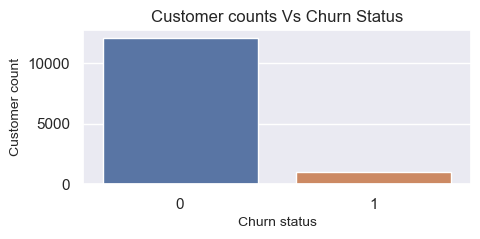

In [91]:
plt.figure(figsize=[5,2])
sns.countplot(data=churn_data_high, x=target_col, palette='deep')
plt.xlabel('Churn status', fontsize=10)
plt.ylabel('Customer count',fontsize=10)
plt.title('Customer counts Vs Churn Status')
plt.show()

### Numerical Columns

In [ ]:
# Start time
start_time = time.time()
# Define the number of subplots (adjust according to your needs)
num_plots = len(num_cols)
# Number of columns in the subplot grid
fig_num_cols = 4  
fig_num_rows = (num_plots // fig_num_cols) + (num_plots % fig_num_cols != 0)  # Calculate number of rows needed
# Set the figure size (width, height) in inches
fig_width = fig_num_cols * 6
fig_height = fig_num_rows * 6
# Create the figure
plt.figure(figsize=(fig_width, fig_height))
# Create subplots
for ax, col in enumerate(num_cols):
    plt.subplot(fig_num_rows, fig_num_cols, ax + 1)
    # Generate a plot for the current column
    sns.distplot( churn_data_high[col] , color='#55A868' )
    # Set the title for the current subplot
    plt.title( f' Univariate Analysis of variable using Distplot - {col} ' )
# Adjust subplot parameters for a tight layout
plt.tight_layout()
# Display the plots
plt.show()
# End time
end_time = time.time()
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

### Categorical Columns

In [ ]:
# Start time
start_time = time.time()
# Define the number of subplots (adjust according to your needs)
num_plots = len(cat_cols)
# Number of columns in the subplot grid
fig_num_cols = 4  
fig_num_rows = (num_plots // fig_num_cols) + (num_plots % fig_num_cols != 0)  # Calculate number of rows needed
# Set the figure size (width, height) in inches
fig_width = fig_num_cols * 6
fig_height = fig_num_rows * 6
# Create the figure
plt.figure(figsize=(fig_width, fig_height))
# Loop through each column to create a subplot
for ax , col in enumerate(cat_cols):
    # Create a subplot for each column
    plt.subplot(fig_num_rows, fig_num_cols, ax+ 1)
    # Order the data
    sort_order=sorted(churn_data_high[col].unique())
    # Generate a  plot for the current column
    sns.countplot( data=churn_data_high , x=col , palette='deep' ,order=sort_order)
    # Set the title for the current subplot
    plt.title( f'Univariate Analysis of Variable - {col}' )
# Adjust subplot parameters for a tight layout
plt.tight_layout()
# Display the plots
plt.show()
# End time
end_time = time.time()
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

### Bivariate Analysis

In [ ]:
# Numerical Vs Categorical
# Start time
start_time = time.time()
# Define the number of subplots (adjust according to your needs)
num_plots = len(num_cols)
# Number of columns in the subplot grid
fig_num_cols = 4  
fig_num_rows = (num_plots // fig_num_cols) + (num_plots % fig_num_cols != 0)  # Calculate number of rows needed
# Set the figure size (width, height) in inches
fig_width = fig_num_cols * 6
fig_height = fig_num_rows * 6
# Create the figure
plt.figure(figsize=(fig_width, fig_height))
# Loop through each column to create a subplot
for ax, col in enumerate(num_cols):
    # Create a subplot for each column
    plt.subplot(fig_num_rows, fig_num_cols, ax+ 1)
    sns.boxplot(x=churn_data_high[target_col], y=churn_data_high[col], palette='deep')
    plt.title(f' Bivariate Analysis of Variable - {col} Vs. {target_col} ')
# Adjust layout
plt.tight_layout()
# Display the plots
plt.show()
# End time
end_time = time.time()
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

In [ ]:
# Categorical Vs Categorical
# Start time
start_time = time.time()
# Define the number of subplots (adjust according to your needs)
num_plots = len(cat_cols)
# Number of columns in the subplot grid
fig_num_cols = 4  
fig_num_rows = (num_plots // fig_num_cols) + (num_plots % fig_num_cols != 0)  # Calculate number of rows needed
# Set the figure size (width, height) in inches
fig_width = fig_num_cols * 6
fig_height = fig_num_rows * 6
# Create the figure
plt.figure(figsize=(fig_width, fig_height))
# Create subplots
for ax, col in enumerate(cat_cols):
    # Create a subplot for each column
    plt.subplot(fig_num_rows, fig_num_cols, ax+ 1)
    sort_order = sorted(churn_data_high[col].unique())
    sns.countplot(data=churn_data_high, x=col, hue=target_col, palette='deep', order=sort_order)
    plt.title(f' Bivariate Analysis of Variable - {col} Vs. {target_col} ')
# Adjust layout
plt.tight_layout()
# Display the plots
plt.show()
# End time
end_time = time.time()
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

### Multivariate Analysis

In [ ]:
#Heatmap of Specific Numerical Variables
# Start time
start_time = time.time()
# Define the number of subplots (adjust according to your needs)
num_plots = len(spl_num_cols)
# Number of columns in the subplot grid
fig_num_cols = 4  
fig_num_rows = (num_plots // fig_num_cols) + (num_plots % fig_num_cols != 0)  # Calculate number of rows needed
# Set the figure size (width, height) in inches
fig_width = fig_num_cols * 6
fig_height = fig_num_rows * 2
# Create the figure
plt.figure(figsize=(fig_width, fig_height))
mask = np.triu(churn_data_high[spl_num_cols].corr())
sns.heatmap(churn_data_high[spl_num_cols].corr(),mask=mask,annot=True,cmap="Reds",annot_kws={"size": 4}),  # Adjust annotation font size)
plt.title('Heatmap of Specific Numerical Variables')
# Display the plots
plt.show()
# End time
end_time = time.time()
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

In [ ]:
#Heatmap of Specific Numerical Variables
# Start time
start_time = time.time()
# Define the number of subplots (adjust according to your needs)
num_plots = len(num_cols)
# Number of columns in the subplot grid
fig_num_cols = 4  
fig_num_rows = (num_plots // fig_num_cols) + (num_plots % fig_num_cols != 0)  # Calculate number of rows needed
# Set the figure size (width, height) in inches
fig_width = fig_num_cols * 6
fig_height = fig_num_rows * 2
# Create the figure
plt.figure(figsize=(fig_width, fig_height))
mask = np.triu(churn_data_high[num_cols].corr())
sns.heatmap(churn_data_high[num_cols].corr(),mask=mask,annot=True,cmap="Reds",annot_kws={"size": 4},cbar_kws={'shrink': 0.8})
plt.title('Heatmap of Numerical Variables')
# Display the plots
plt.show()
# End time
end_time = time.time()
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

### Analyze August Data Usage and Recharge Amounts with Various Hue Indicators"

In [ ]:
# Start time
start_time = time.time()
# Define columns for the X and Y axes for June data
cols_x_aug = 'total_month_rech_amt_aug'  # Total recharge amount in August
cols_y_aug = 'total_vol_2g_3g_mb_aug'    # Total data usage in AUgust
# Define the columns to be used as hue (color) in the scatter plots for August data
cols_hue_aug = ['churn_probability', 'fb_user_aug', 'monthly_2g_aug', 'monthly_3g_aug']
# Create scatter plots with different hues for the selected columns
for hue_col in cols_hue_aug:
    sns.pairplot(churn_data_high, x_vars=cols_x_aug, y_vars=cols_y_aug, hue=hue_col, 
                 kind='scatter', palette='deep', aspect=0.8)
    plt.title(f'Churn Probability, Social Media Usage, and 2G/3G Monthly Usage (August) - Scatter Plot with {hue_col}')
    plt.ylabel('Total Data Used in August (MB)')
    plt.xlabel('Total Amount Spent in August')
# Adjust layout
plt.tight_layout()
# Display the plots
plt.show()
# End time
end_time = time.time()
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

### Observations from the Bivariate Analysis :
    
    - Call Usage: Most users show low call usage, with some heavy users as outliers.
    - Churn Probability: Higher usage generally correlates with a higher likelihood of churn.
    - Outliers: Numerous outliers suggest a few users have extreme usage patterns.
    - Monthly Comparison: Median usage is consistent across months, but individual behaviors vary.
    - Roaming Usage: High variance in roaming usage, with heavy roamers showing more churn risk.
    - Data Usage (2G/3G): Higher data consumption is linked to a greater chance of churn.
    - Service Type Influence: Frequent STD and ISD callers tend to have a higher churn probability.
    - Facebook and similar social networking sites user : Most users are not Facebook users across all three months, with a consistent trend of slightly higher churn among non-users.
    - Monthly 2G Usage: Across June, July, and August, the majority of users have minimal 2G usage, with a higher churn rate observed among users with increased 2G usage.
    - Monthly 3G Usage: Consistently low 3G usage across all three months, with higher 3G usage correlating with a higher churn probability.
    - Night Pack Users: Most users do not use night packs in any of these months, with a small segment of night pack users showing a higher churn rate.
    
### Observations from the Multivariate Analysis:
    - High correlation among ARPU variables in June, July, and August.
    - Strong positive correlations among total_rech_amt variables for all months.
    - Moderate correlation between outgoing and incoming minutes of usage.
    - Weak correlation between total recharge numbers and ARPU.
    - Stable user behavior across different months.
    - Potential redundancy in variables due to high correlations.
    - Consistent trends in total minutes of usage (total_mou) across months.
    - Recharge and usage patterns are closely linked.
    - Low negative correlation between some recharge and usage metrics.
    - Higher correlations in same-category features like total_arpu and total_mou
    - Churn Probability vs. Total Spent: Most churn cases occur with lower spending in August.
    - Facebook Usage vs. Total Spent: Users are split into two groups with no clear spending pattern.
    - 2G Usage vs. Total Spent: 2G usage varies widely across different spending levels.
    - 3G Usage vs. Total Spent: 3G usage also shows diverse patterns with spending in August.

## Interfences :
    - Age on Network (aon): AON seems to be a strong indicator of churn, with most users churning around 850 days.
    - Total Recharge Amount (total_rech_amt): The recharge amount was significantly higher for churned customers in June and July but dropped sharply in August.
    - Data Recharge Amount (total_rech_data_amt): Data recharge amounts also decreased each month for churned customers.
    - Average Revenue Per User (total_arpu_2g_3g): There was a significant drop in ARPU for churned customers between the "good" and "action" phases.
    - Maximum Recharge Amount (max_rech_amt): Churned customers saw a notable drop in their maximum recharge amounts between the "good" and "action" phases.
    - Total Recharge Values (total_rech_amt): The biggest drop in total recharge values occurred among churned customers compared to non-churned customers between the "good" and "action" phases.
    - Maximum Data Recharge Values (max_rech_data): Churned customers also experienced the largest decline in maximum data recharges compared to non-churned customers during this period.
    - Data Pack Usage (night_pck_user, monthly_2g_, monthly_3g_): For night, 2G, and 3G data packs, the churn rate was significant in the "action" phase.
    - On-net and Off-net Usage (onnet_mou, offnet_mou): Churned customers had the highest drop in on-net and off-net values compared to non-churned customers between the "good" and "action" phases.
    - Revenue Per User (total_arpu_2g_3g): Both 2G and 3G usage showed similar trends in revenue per user across the months.
    Roaming Usage (total_roam_mou_aug, total_roam_mou_jul, total_roam_mou_jun): High roaming charges are associated with increased churn, indicating that users with significant roaming activity are more likely to switch providers.
    - Call Usage Patterns (mean_total_std_mou, mean_total_ic_mou): Users with high call usage, especially those who frequently make STD and ISD calls, exhibit a higher churn probability, suggesting dissatisfaction with current pricing or service plans.
    - 2G and 3G Data Usage (total_vol_2g_3g_mb_aug, total_vol_2g_3g_mb_jul, total_vol_2g_3g_mb_jun): Higher data usage, both in 2G and 3G categories, correlates with increased churn, highlighting a potential need for better data package options or enhanced service quality for high-data users.
    - Night Pack Usage (night_pck_user_aug, night_pck_user_jul, night_pck_user_jun): Despite a small segment of night pack users, this group shows a higher churn rate, indicating that night pack offerings may not be meeting user expectations or needs effectively.
    - Facebook Usage Correlation (fb_user_aug, fb_user_jul, fb_user_jun): Users who are not on Facebook tend to have a slightly higher churn rate, suggesting that engagement with social networks could be linked to greater service satisfaction or loyalty.
    - Monthly Usage Consistency (total_mou_aug, total_mou_jul, total_mou_jun): Consistent monthly median usage, despite individual variations, suggests that overall user behavior remains stable, but outliers with extreme usage patterns could be driving churn.
    - Recharge Frequency (total_rech_num_aug, total_rech_num_jul, total_rech_num_jun): Users with a high frequency of recharges but lower total recharge amounts show an increased likelihood of churn, indicating potential dissatisfaction or financial constraints affecting their spending patterns.

# Model Building

### Let's drop date columns first

In [90]:
churn_data_high_copy3=churn_data_high.copy()
churn_data_unseen_copy3=churn_data_unseen.copy()

In [91]:
### churn_data_unseen=churn_data_unseen_copy3
### churn_data_unseen_columns=findCustomColumnTypes(df=churn_data_unseen, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)
### churn_data_unseen.drop(churn_data_unseen_columns["datetime_columns"], axis=1,inplace=True)

In [92]:
### churn_data_high = churn_data_high_copy3.copy()
### churn_data_unseen = churn_data_unseen_copy3.copy()

In [93]:
# update column_dict
churn_data_columns=findCustomColumnTypes(df=churn_data_high, search_type='all_search', target_column=target_col, include_all=False,  keyword=None , cut_off_val=7)
churn_data_unseen_columns=findCustomColumnTypes(df=churn_data_unseen, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)

In [94]:
### drop date columns
churn_data_high.drop(churn_data_columns["datetime_columns"], axis=1,inplace=True)
churn_data_unseen.drop(churn_data_unseen_columns["datetime_columns"], axis=1,inplace=True)

In [95]:
# Set Index
churn_data_high = churn_data_high.set_index('id')
#churn_data_unseen=churn_data_unseen.set_index('id')

In [96]:
# update column_dict
churn_data_columns=findCustomColumnTypes(df=churn_data_high, search_type='all_search', target_column=target_col, include_all=False,  keyword=None , cut_off_val=7)
churn_data_unseen_columns=findCustomColumnTypes(df=churn_data_unseen, search_type='all_search', target_column=target_col, include_all=False,  keyword=None)
# Print Date columns
print (churn_data_columns["datetime_columns"] ,churn_data_unseen_columns["datetime_columns"] )
# Print the shape of the DataFrame after imputation for the training set
print("Seen Set Shape :- ", churn_data_high.shape)
# Separator line for clarity
print("=" * 120)
# Print the shape of the DataFrame after imputation for the test set
print("Unseen Set Shape :- ", churn_data_unseen.shape)

[] []
Seen Set Shape :-  (13167, 133)
Unseen Set Shape :-  (30000, 133)


### Train - Test Split

In [97]:
# Putting target variable to y
y = churn_data_high[target_col]
# Remove target variable from all features and assign X
X = churn_data_high.drop(target_col, axis=1)

print( X.shape , y.shape)

(13167, 132) (13167,)


In [98]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
print( X_train.shape , X_test.shape , y_train.shape , y_test.shape )

(9216, 132) (3951, 132) (9216,) (3951,)


### Balancing the Dataset using SMOTE

In [99]:
# Instantiate SMOTE
smote = SMOTE( random_state=42 )
# Fittign SMOTE to the train set
X_train, y_train = smote.fit_resample(X_train, y_train)
# Check data imbalance in the target column i.e., 'churn_probability' for train set
round ( 100 * y_train.value_counts(normalize=True) , 2)

churn_probability
0    50.0
1    50.0
Name: proportion, dtype: float64

### Feature Scaling

In [100]:
# Instantiate the Scaler
scaler = StandardScaler()
column_to_scale=churn_data_columns["numerical_columns"]+churn_data_columns["categorical_columns"]
# Fit the data into scaler and transform
X_train[column_to_scale] = scaler.fit_transform(X_train[column_to_scale])
# Transform the test set
X_test[column_to_scale] = scaler.transform(X_test[column_to_scale])
# Print the shape of the transformed training and testing datasets
# X_train and X_test are now scaled; their shapes remain unchanged
print(f"Shape of X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}, y_test: {y_test.shape}")

Shape of X_train: (16950, 132), X_test: (3951, 132)
Shape of y_train: (16950,), y_test: (3951,)


In [101]:
X_train.describe()

arpu_jun      arpu_jul      arpu_aug  onnet_mou_jun  onnet_mou_jul  \
count  1.695000e+04  1.695000e+04  1.695000e+04   1.695000e+04   1.695000e+04   
mean  -8.216305e-17  1.743869e-16 -1.911549e-16   2.515196e-17   6.916788e-18   
std    1.000029e+00  1.000029e+00  1.000029e+00   1.000029e+00   1.000029e+00   
min   -1.878076e+00 -1.720261e+00 -1.259793e+00  -7.197020e-01  -6.814299e-01   
25%   -7.360408e-01 -7.519926e-01 -8.933170e-01  -6.719592e-01  -6.494604e-01   
50%   -7.073521e-02 -5.030292e-02 -2.157072e-01  -4.255734e-01  -4.388213e-01   
75%    5.444744e-01  5.943981e-01  6.336917e-01   1.786964e-01   1.976675e-01   
max    5.078046e+00  6.086032e+00  6.347155e+00   4.250220e+00   5.487237e+00   

       onnet_mou_aug  offnet_mou_jun  offnet_mou_jul  offnet_mou_aug  \
count   1.695000e+04    1.695000e+04    1.695000e+04    1.695000e+04   
mean    5.281911e-17   -1.366590e-16    5.533430e-17   -5.030391e-18   
std     1.000029e+00    1.000029e+00    1.000029e+00    1.000029e+00   
min    -5.408601e-01   -9.504966e-01   -8.803526e-01   -7.069797e-01   
25%    -5.388460e-01   -7.694584e-01   -7.525509e-01   -6.908378e-01   
50%    -4.218145e-01   -3.364419e-01   -3.694793e-01   -4.427979e-01   
75%     2.767816e-02    4.427301e-01    4.095106e-01    3.089554e-01   
max     6.500736e+00    5.030790e+00    5.106989e+00    6.454857e+00   

       spl_og_mou_jun  ...  mean_total_std_t2m_mou  total_loc_t2f_mou_jun  \
count    1.695000e+04  ...            1.695000e+04           1.695000e+04   
mean    -3.835673e-17  ...           -1.760637e-17          -2.012156e-17   
std      1.000029e+00  ...            1.000029e+00           1.000029e+00   
min     -3.895507e-01  ...           -6.756181e-01          -5.901797e-01   
25%     -3.895507e-01  ...           -6.601285e-01          -5.901797e-01   
50%     -3.313164e-01  ...           -4.846139e-01          -4.400750e-01   
75%      6.692667e-03  ...            2.267006e-01           1.197548e-01   
max      4.082497e+01  ...            5.068873e+00           5.545277e+00   

       total_loc_t2f_mou_jul  total_loc_t2f_mou_aug  mean_total_loc_t2f_mou  \
count           1.695000e+04           1.695000e+04            1.695000e+04   
mean            1.676797e-17           2.012156e-17           -3.353594e-18   
std             1.000029e+00           1.000029e+00            1.000029e+00   
min            -5.539570e-01          -4.730523e-01           -6.203836e-01   
25%            -5.539570e-01          -4.730523e-01           -5.920597e-01   
50%            -4.412343e-01          -4.535231e-01           -4.321130e-01   
75%             7.243308e-02          -4.566449e-02            1.359055e-01   
max             6.327754e+00           6.877416e+00            6.637198e+00   

       total_std_t2f_mou_jun  total_std_t2f_mou_jul  total_std_t2f_mou_aug  \
count           1.695000e+04           1.695000e+04           1.695000e+04   
mean           -1.509117e-17          -2.515196e-18           2.347516e-17   
std             1.000029e+00           1.000029e+00           1.000029e+00   
min            -1.795315e-01          -1.729094e-01          -1.343914e-01   
25%            -1.795315e-01          -1.729094e-01          -1.343914e-01   
50%            -1.795315e-01          -1.729094e-01          -1.343914e-01   
75%            -1.544596e-01          -1.634298e-01          -1.343914e-01   
max             3.858100e+01           3.552184e+01           6.090524e+01   

       mean_total_std_t2f_mou  mean_total_loc_t2c_mou  
count            1.695000e+04            1.695000e+04  
mean            -1.886397e-17           -2.012156e-17  
std              1.000029e+00            1.000029e+00  
min             -1.880475e-01           -3.401987e-01  
25%             -1.880475e-01           -3.401987e-01  
50%             -1.880475e-01           -3.268869e-01  
75%             -1.259713e-01           -5.516202e-02  
max              4.738478e+01            3.710081e+01  

[8 rows x 132 colu

### Model with PCA

In [102]:
# Instantiate PCA
pca = PCA(random_state=42)
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [103]:
# Principal components
pca.components_

array([[ 1.03272681e-01,  1.22087352e-01,  8.26369227e-02, ...,
         5.25698937e-03,  5.09812699e-03, -4.72043599e-03],
       [ 2.49497305e-02,  1.08194873e-01,  1.71650707e-01, ...,
         4.09925432e-02,  4.04875844e-02,  2.07125055e-03],
       [ 2.32301141e-02,  7.88865972e-02,  6.38239977e-02, ...,
        -1.09917728e-02, -1.35074021e-02,  3.64591790e-04],
       ...,
       [ 0.00000000e+00, -5.76838723e-16,  4.48360690e-16, ...,
        -3.02709247e-15, -6.29357677e-15, -9.02056208e-17],
       [-0.00000000e+00,  4.02022157e-16, -3.76575768e-16, ...,
         6.63011313e-15, -1.69135539e-14,  5.03069808e-17],
       [ 0.00000000e+00,  8.72723719e-17, -8.35702061e-17, ...,
        -8.39606162e-15,  1.27640953e-14,  1.19695920e-16]])

In [104]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.16856872 0.28760505 0.35536085 0.41771218 0.45309503 0.48547006
 0.51395126 0.54217642 0.56880174 0.59479333 0.61937245 0.6410891
 0.65934307 0.67549478 0.69092616 0.704601   0.71807261 0.73097312
 0.74364578 0.75553027 0.7667334  0.77706537 0.7867008  0.79583661
 0.80476911 0.8128297  0.82048045 0.82797413 0.8351638  0.84198198
 0.8483451  0.85446279 0.86045082 0.86640232 0.87220176 0.87757395
 0.88291425 0.8882317  0.89303208 0.89766424 0.90217834 0.90660068
 0.91098919 0.9152592  0.91936811 0.92342296 0.92728023 0.9309904
 0.93468461 0.93809644 0.94137762 0.94457486 0.9477423  0.95083027
 0.95371918 0.9564545  0.95904991 0.96162755 0.96407703 0.96636028
 0.96858966 0.97073336 0.97277022 0.97473829 0.97665201 0.97847828
 0.98026139 0.98182944 0.98336199 0.98487508 0.98607888 0.9872163
 0.98828223 0.98932265 0.99031369 0.99123145 0.99212426 0.99289509
 0.993651   0.99437612 0.99503237 0.99560776 0.9961012  0.99657724
 0.99698898 0.99737967 0.99771948 0.99805074 0.99833242 0.9985980

### Scree Plot

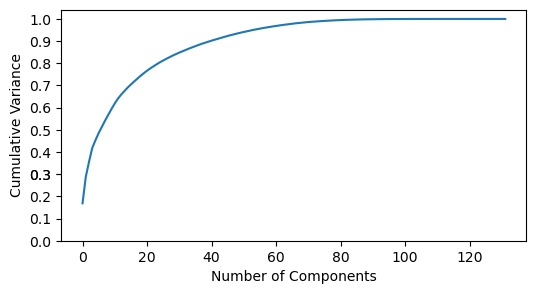

In [105]:
# Plotting scree plot
fig = plt.figure(figsize = (6,3))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.yticks([0,0.1,0.2,0.3,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

#### We can see that `60 components` explain amost more than 95% variance of the data. So, we will perform PCA with 60 components.

### So will perform PCA again with 60 components

In [106]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)
# Applying transformation on the test set
X_test_pca = pca_final.transform(X_test)

# Print the shape of the transformed training and testing datasets
# X_train and X_test are now scaled; their shapes remain unchanged
print(f"Shape of X_train: {X_train_pca.shape}, X_test: {X_test_pca.shape}")
print(f"Shape of y_train: {y_train.shape}, y_test: {y_test.shape}")

Shape of X_train: (16950, 60), X_test: (3951, 60)
Shape of y_train: (16950,), y_test: (3951,)


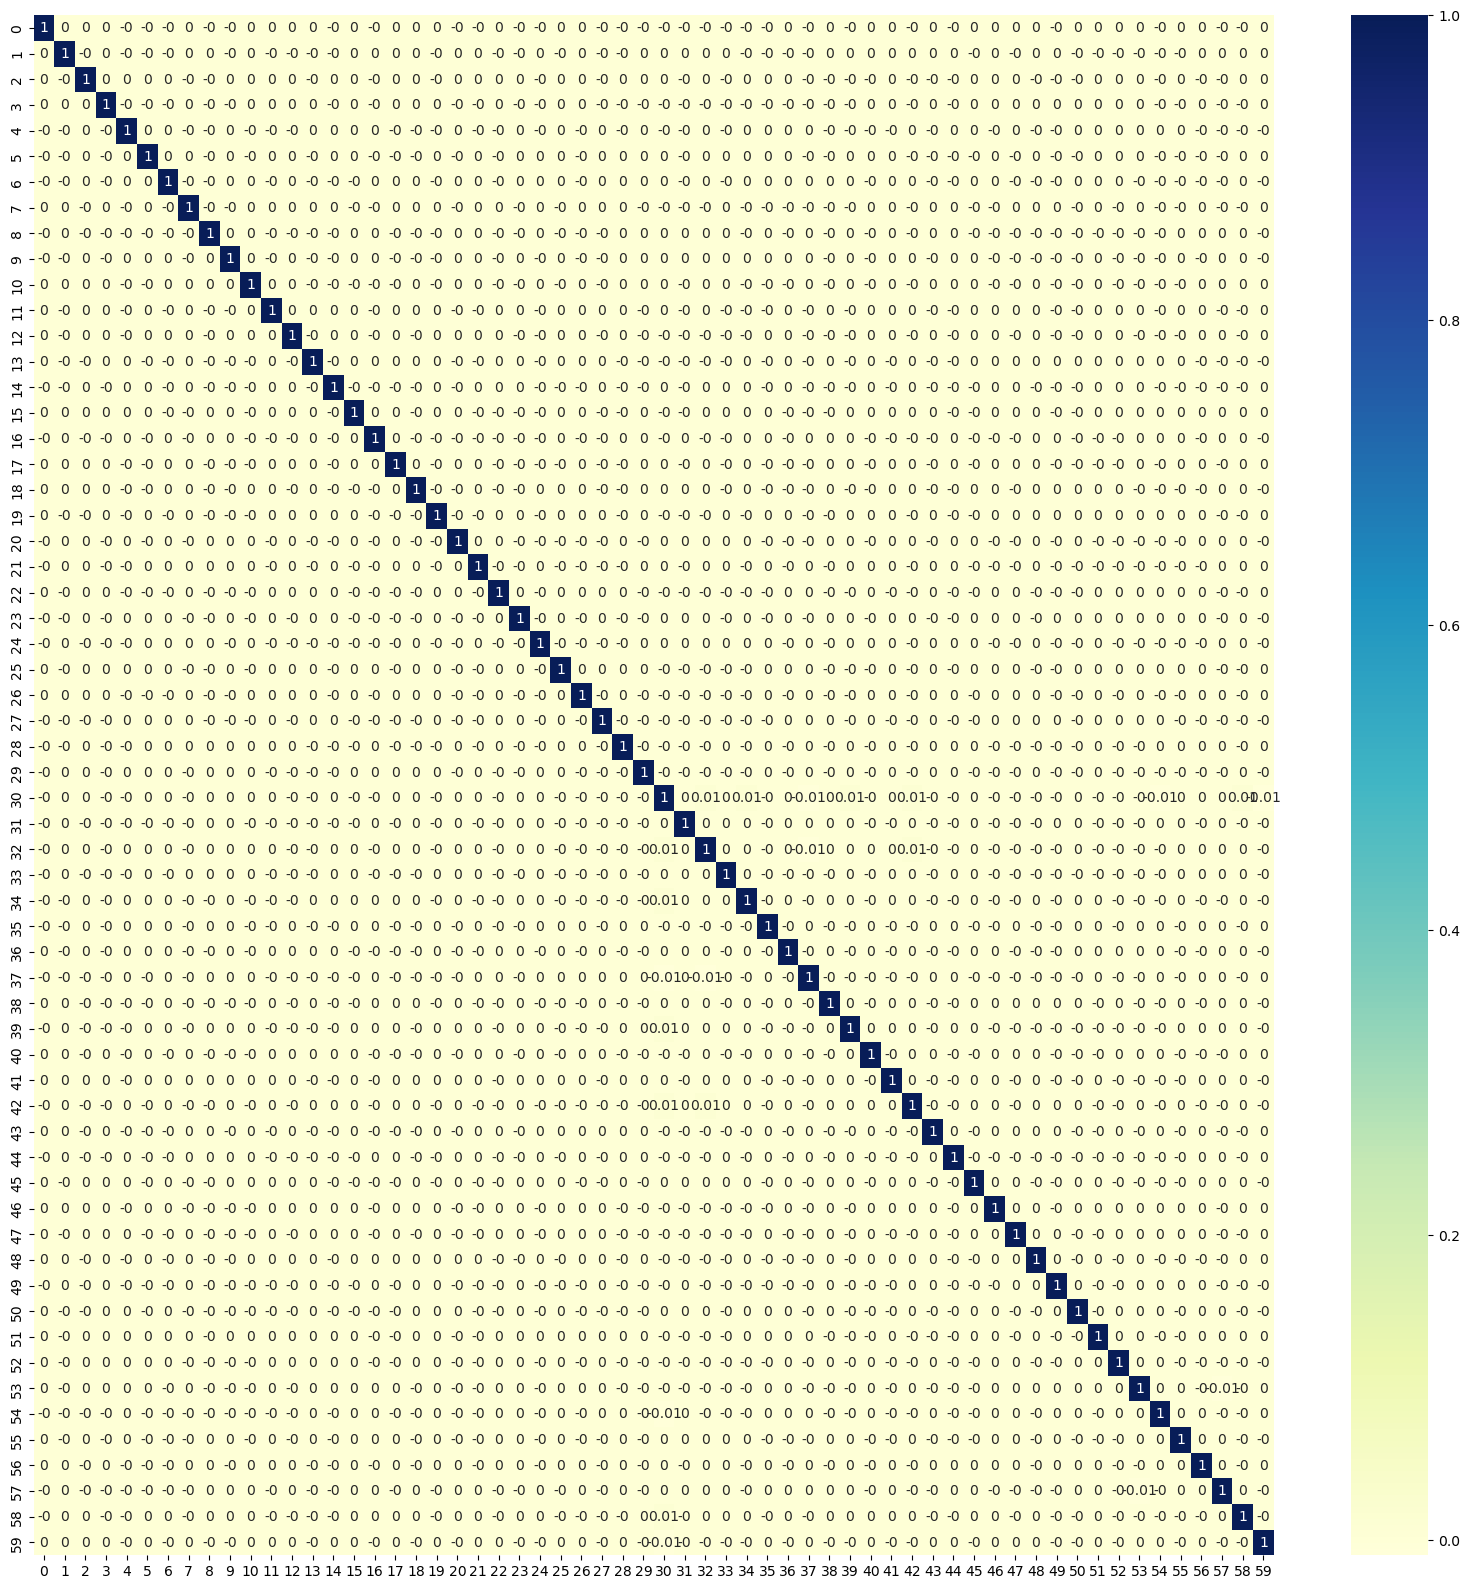

In [107]:
# Validate corr matrix
## Checking for multi-collinearity with HeatMap
corr = np.round(np.corrcoef(X_train_pca.transpose()),2)
plt.figure(figsize = (20,20))
sns.heatmap(corr, annot= True, cmap="YlGnBu")
plt.show()

# We will now try the below Models :-
1. <b>Logistic Regression on Train - Test Set:</b>
     - Train a Logistic Regression model on the training set.
     - Evaluate its performance on the test set using appropriate metrics such as accuracy, sensitivity, specificity, etc.
2. <b>Decision Tree Classifier on Train - Test Set:</b>
    - Train a Decision Tree Classifier on the training set.
    - Assess its performance on the test set to understand its strengths and weaknesses compared to other models.
3. <b>Random Forest Classifier on Train - Test Set:</b>
    - Train a Random Forest Classifier on the training set.
    - Evaluate its performance on the test set to see how well it generalizes.
4. <b>Random Forest Classifier on Entire Seen Set:</b>
    - Train a Random Forest Classifier on the entire seen dataset (a combination of the training and test sets, or a larger dataset that has been completely observed).
    - This will give us an understanding of how the model performs on a comprehensive dataset.
5. <b>Create Final Pipeline Model as per the Best Result:</b>
    - Based on the evaluation of the above models, select the one that provides the best results.
    - Build the final model pipeline using the chosen algorithm. This pipeline will include data preprocessing steps, model training, and potentially hyperparameter tuning.

## Some useful custom functions

In [108]:
def evaluate_model( X_true, y_true, estimator, data_name, dataset_type, cut_off=0.5 ):
    
    print(f"Evaluating {dataset_type} Set: data set name - {data_name}")
    # Prediction
    y_pred = estimator.predict(X_true)
    y_pred_prob = estimator.predict_proba(X_true)[:, 1]
    
    if cut_off!=0.5 :
        # Binarize predictions based on the cutoff
        y_pred = [1 if prob >= cut_off else 0 for prob in y_pred_prob]
    
    # Confusion matrix
    confusion = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", confusion)
    
    # Classification report
    classification = classification_report(y_true, y_pred)
    print("\nClassification Report:\n", classification)
    
    # Extract TP, TN, FP, FN
    TP = confusion[1, 1]  # True Positive
    TN = confusion[0, 0]  # True Negative
    FP = confusion[0, 1]  # False Positive
    FN = confusion[1, 0]  # False Negative
    
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {round(100 * accuracy, 2)}%")
    
    # Sensitivity (Recall for the positive class)
    sensitivity = TP / float(TP + FN) if (TP + FN) > 0 else 0
    print(f"Sensitivity: {round(100 * sensitivity, 2)}%")
    
    # Specificity (Recall for the negative class)
    specificity = TN / float(TN + FP) if (TN + FP) > 0 else 0
    print(f"Specificity: {round(100 * specificity, 2)}%")
    
    # Precision
    precision = precision_score(y_true, y_pred)
    print(f"Precision: {round(100 * precision, 2)}%")
    
    # Recall
    recall = recall_score(y_true, y_pred)
    print(f"Recall: {round(100 * recall, 2)}%")
    
    # ROC AUC score
    roc_auc = roc_auc_score(y_true, y_pred_prob)
    print(f"ROC AUC Score: {round(100 * roc_auc, 2)}%")

In [109]:
def plot_roc_curve( X_true, y_true, estimator, data_name, dataset_type ):
    print(f"Evaluating {dataset_type} Set: data set name - {data_name}")
    # Prediction
    y_pred = estimator.predict(X_true)
    y_pred_prob = estimator.predict_proba(X_true)[:, 1]
    # Compute False Positive Rate (FPR) and True Positive Rate (TPR)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc_score = roc_auc_score(y_true, y_pred_prob)
    plt.figure(figsize=(6, 3))
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
    # Diagonal line for random guessing
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [110]:
def find_optimal_cutoff2(X_true, y_true, estimator, data_name, dataset_type, start=0.0, end=1.1, step=0.1):
    """
    Function to find the optimal probability cutoff for classifying binary outcomes (e.g., churn vs. non-churn) 
    using a given estimator (e.g., logistic regression).
    
    Parameters:
    - X_true: Feature matrix for the dataset to be evaluated.
    - y_true: Actual binary labels (0 or 1) for the target variable.
    - estimator: Trained model used to predict probabilities for the positive class.
    - data_name: Name of the dataset being evaluated (used for print statements).
    - dataset_type: Type of the dataset (e.g., 'Train' or 'Test') being evaluated (used for print statements).
    - start: Starting value for the range of probability cutoffs (default is 0.0).
    - end: Ending value for the range of probability cutoffs (default is 1.1 to include 1.0).
    - step: Step size for iterating through probability cutoffs (default is 0.1).
    
    Returns:
    - cutoff: DataFrame containing the cutoff values and their corresponding metrics (accuracy, sensitivity, specificity).
    - optimal_cutoff: The cutoff value that optimizes the chosen metric (in this case, accuracy).
    """
    print(f"Evaluating {dataset_type} Set: data set name - {data_name}")
    
    # Prediction probabilities for the positive class
    y_pred_prob = estimator.predict_proba(X_true)[:, 1]
    
    # Define cutoff values
    numbers = np.arange(start, end, step)
    
    # List to store results
    results = []

    for i in numbers:
        # Binarize predictions based on cutoff
        y_pred = [1 if prob >= i else 0 for prob in y_pred_prob]

        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Calculate metrics
        accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
        specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0
        sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) > 0 else 0

        # Store the results in a dictionary
        results.append({
            'probability': i, 
            'accuracy': accuracy, 
            'sensitivity': sensitivity, 
            'specificity': specificity
        })

    # Convert results list to DataFrame
    cutoff = pd.DataFrame(results)

    print(cutoff)

    # Plot the results
    plt.figure(figsize=(8, 6))
    cutoff.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'], marker='o')
    plt.title('Cutoff vs Accuracy, Sensitivity, Specificity')
    plt.xlabel('Probability Cutoff')
    plt.ylabel('Metric Value')
    plt.grid(True)
    plt.show()

    # Find the optimal cutoff based on accuracy
    optimal_cutoff = cutoff.loc[cutoff['accuracy'].idxmax()]

    print(f"Optimal Cutoff: {optimal_cutoff['probability']:.2f}")
    print(f"Accuracy: {optimal_cutoff['accuracy']:.2f}")
    print(f"Sensitivity: {optimal_cutoff['sensitivity']:.2f}")
    print(f"Specificity: {optimal_cutoff['specificity']:.2f}")

    return cutoff, optimal_cutoff['probability']

In [111]:
def find_optimal_cutoff(X_true, y_true, estimator, data_name, dataset_type , start=0.0 , end=1.1 , step=0.1):
    """
    Function to find the optimal probability cutoff for classifying binary outcomes (e.g., churn vs. non-churn) 
    using a given estimator (e.g., logistic regression).
    
    Parameters:
    - X_true: Feature matrix for the dataset to be evaluated.
    - y_true: Actual binary labels (0 or 1) for the target variable.
    - estimator: Trained model used to predict probabilities for the positive class.
    - data_name: Name of the dataset being evaluated (used for print statements).
    - dataset_type: Type of the dataset (e.g., 'Train' or 'Test') being evaluated (used for print statements).
    - start: Starting value for the range of probability cutoffs (default is 0.0).
    - end: Ending value for the range of probability cutoffs (default is 1.1 to include 1.0).
    - step: Step size for iterating through probability cutoffs (default is 0.1).
    
    Returns:
    - cutoff: DataFrame containing the cutoff values and their corresponding metrics (accuracy, sensitivity, specificity).
    - optimal_cutoff: The cutoff value that optimizes the chosen metric (in this case, accuracy).
    """
    print(f"Evaluating {dataset_type} Set: data set name - {data_name}")
    # Prediction
    y_pred = estimator.predict(X_true)
    y_pred_prob = estimator.predict_proba(X_true)[:, 1]
    
    # Let's create columns with different probability cutoffs
    numbers = np.arange(start, end , step)
    
    cutoff = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

    for i in numbers:
        # Binarize predictions based on cutoff
        y_pred = [1 if prob > i else 0 for prob in y_pred_prob]

        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Calculate metrics
        accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
        specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0
        sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) > 0 else 0

        # Store the results
        cutoff.loc[i] = [i, accuracy, sensitivity, specificity]

    print(cutoff)

    # Plot the results
    plt.figure(figsize=(3, 3))
    cutoff.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'])
    plt.title('Cutoff vs Accuracy, Sensitivity, Specificity')
    plt.xlabel('Probability Cutoff')
    plt.ylabel('Metric Value')
    plt.grid(True)
    plt.show()

    # Find the optimal cutoff based on accuracy
    optimal_cutoff = cutoff.loc[cutoff['accuracy'].idxmax()]

    print(f"Optimal Cutoff: {optimal_cutoff['probability']:.2f}")
    print(f"Accuracy: {optimal_cutoff['accuracy']:.2f}")
    print(f"Sensitivity: {optimal_cutoff['sensitivity']:.2f}")
    print(f"Specificity: {optimal_cutoff['specificity']:.2f}")

    return cutoff, optimal_cutoff['probability']

In [112]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    #feature_names=X_train_pca.columns, 
                    class_names=["Not Churn", "Churn"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

## Logistic Regression

In [113]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Specify parameter grid
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specify multiple scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision',
    'f1': 'f1'
}

# Instantiate Logistic Regression
lr=LogisticRegression(random_state=42)

# Create GridSearchCV object with multiple scoring metrics
lr_model_cv = GridSearchCV(estimator=lr,
                        param_grid=params, 
                        scoring=scoring,  # Multiple scores
                        refit='accuracy', # Choose the main score for refitting
                        cv=folds,
                        n_jobs = -1,
                        verbose=3,
                        return_train_score=True)

In [114]:
# Log Start Time
start_time=time.time()

# Fit the model
lr_model_cv.fit(X_train_pca, y_train)

# Log End time
end_time = time.time()
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Execution time: 12.765955209732056 seconds


In [115]:
# results of grid search CV
cv_results = pd.DataFrame(lr_model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.224981      0.021193         0.056246        0.007653    0.01   
1       0.378450      0.031703         0.046854        0.000031     0.1   
2       0.390757      0.034269         0.062679        0.009885       1   
3       0.512620      0.087884         0.084364        0.012499      10   
4       0.578062      0.043069         0.065619        0.011691     100   
5       0.565853      0.070332         0.081784        0.018233    1000   

        params  split0_test_accuracy  split1_test_accuracy  \
0  {'C': 0.01}              0.849263              0.851032   
1   {'C': 0.1}              0.851917              0.852507   
2     {'C': 1}              0.852212              0.852507   
3    {'C': 10}              0.851917              0.852802   
4   {'C': 100}              0.852507              0.852802   
5  {'C': 1000}              0.852507              0.853097   

   split2_test_accuracy  split3_test_accuracy  ...  mean_test_f1  std_test_f1  \
0              0.864602              0.865487  ...      0.859390     0.007410   
1              0.864012              0.868437  ...      0.861685     0.007287   
2              0.863422              0.868732  ...      0.861848     0.007266   
3              0.863127              0.868732  ...      0.861797     0.007263   
4              0.862832              0.868732  ...      0.861898     0.007103   
5              0.862832              0.868732  ...      0.861932     0.007006   

   rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
0             6         0.863976         0.863069         0.859352   
1             5         0.867033         0.864712         0.863299   
2             3         0.866700         0.864525         0.863524   
3             4         0.866681         0.864485         0.863669   
4             2         0.866681         0.864548         0.863504   
5             1         0.866826         0.864630         0.863504   

   split3_train_f1  split4_train_f1  mean_train_f1  std_train_f1  
0         0.859599         0.862742       0.861748      0.001900  
1         0.861718         0.864621       0.864277      0.001756  
2         0.861281         0.864059       0.864018      0.001743  
3         0.861530         0.864079       0.864089      0.001649  
4         0.861447         0.864059       0.864048      0.001688  
5         0.861447         0.864079       0.864097      0.001738  

[6 rows x 66 columns]

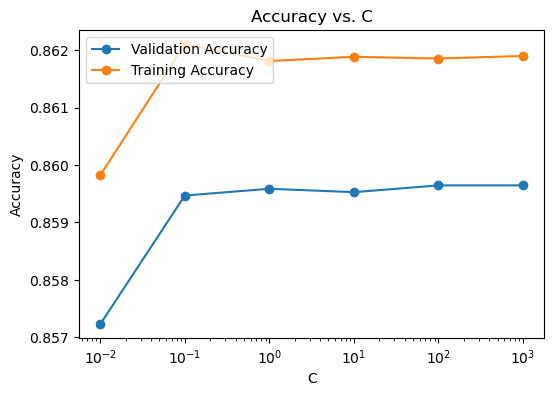

In [116]:
# plot of C versus train and validation scores

plt.figure(figsize=(6, 4))
plt.plot(cv_results['param_C'], cv_results['mean_test_accuracy'], marker='o', label='Validation Accuracy')
plt.plot(cv_results['param_C'], cv_results['mean_train_accuracy'], marker='o', label='Training Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.xscale('log')
plt.title('Accuracy vs. C')
plt.show()

In [117]:
# Best score with best C
best_score = round( lr_model_cv.best_score_ , 2)
best_C = lr_model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

# Get the best model
best_model = lr_model_cv.best_estimator_

 The highest test sensitivity is 0.86 at C = 100


#### Logistic regression with optimal C

In [118]:
# Instantiate the model with best C
# Get the best model
lr_best=lr_model_cv.best_estimator_
# Fit the model on the train set
lr_best_fit = lr_best.fit(X_train_pca, y_train)

### Evaluate Model

In [119]:
# Evaluate Model on Train Set
evaluate_model( X_true=X_train_pca , y_true=y_train , estimator=lr_best_fit , data_name="X_train_pca", dataset_type="Train")

Evaluating Train Set: data set name - X_train_pca
Confusion Matrix:
 [[7168 1307]
 [1034 7441]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      8475
           1       0.85      0.88      0.86      8475

    accuracy                           0.86     16950
   macro avg       0.86      0.86      0.86     16950
weighted avg       0.86      0.86      0.86     16950

Accuracy: 86.19%
Sensitivity: 87.8%
Specificity: 84.58%
Precision: 85.06%
Recall: 87.8%
ROC AUC Score: 93.53%


### ROC Curve

Evaluating Train Set: data set name - X_train_pca


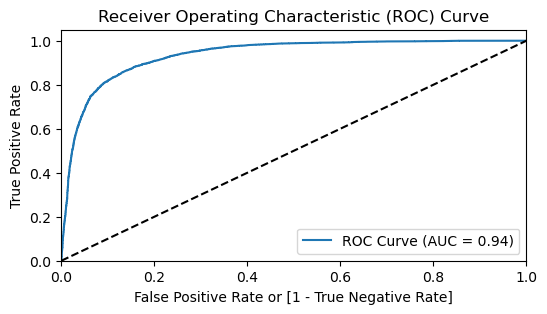

In [120]:
# Calling the function
plot_roc_curve(X_true=X_train_pca , y_true=y_train , estimator=lr_best_fit , data_name="X_train_pca", dataset_type="Train")

### Find a cut off for optimal result

Evaluating Train Set: data set name - X_train_pca
     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.769735     0.984543     0.554926
0.2          0.2  0.817640     0.965192     0.670088
0.3          0.3  0.842419     0.938525     0.746313
0.4          0.4  0.854159     0.908201     0.800118
0.5          0.5  0.861888     0.877994     0.845782
0.6          0.6  0.860649     0.836696     0.884602
0.7          0.7  0.852920     0.786785     0.919056
0.8          0.8  0.824956     0.701947     0.947965
0.9          0.9  0.735929     0.494513     0.977345
1.0          1.0  0.500000     0.000000     1.000000


<Figure size 300x300 with 0 Axes>

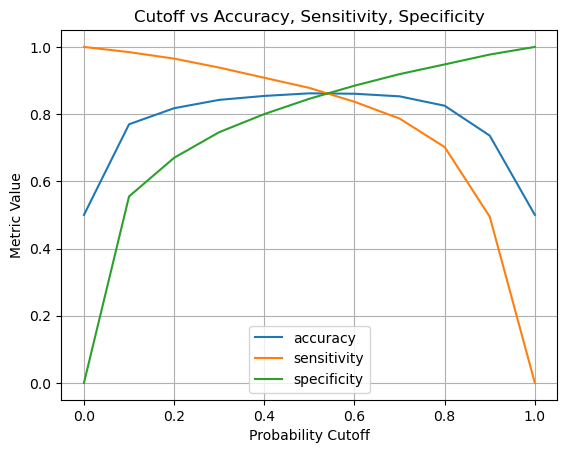

Optimal Cutoff: 0.50
Accuracy: 0.86
Sensitivity: 0.88
Specificity: 0.85


In [121]:
cutoff_df, optimal_cutoff = find_optimal_cutoff(X_true=X_train_pca , y_true=y_train , estimator=lr_best_fit , data_name="X_train_pca", dataset_type="Train", start=0.0 , end=1.1 , step=0.1)

### Evaluate Model

In [122]:
# Evaluate Model on Test Set
evaluate_model(X_true=X_test_pca , y_true=y_test , estimator=lr_best_fit , data_name="X_test_pca", dataset_type="Test")

Evaluating Test Set: data set name - X_test_pca
Confusion Matrix:
 [[3049  593]
 [  63  246]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90      3642
           1       0.29      0.80      0.43       309

    accuracy                           0.83      3951
   macro avg       0.64      0.82      0.67      3951
weighted avg       0.93      0.83      0.87      3951

Accuracy: 83.4%
Sensitivity: 79.61%
Specificity: 83.72%
Precision: 29.32%
Recall: 79.61%
ROC AUC Score: 88.87%


***Model summary***
- Train set
    - Train Set Accuracy :- 87.59 %
    - Train Set Sensitivity :- 89.47 %
    - Train Set Specificity :- 85.7 %
    - Train Set Precision :- 86.22 %
    - Train Set Recall :- 89.47 %
    - Train Set RUC_AUC Score :- 94 %

- Test set
    - Test Set Accuracy :- 84.26 %
    - Test Set Sensitivity :- 78.64 %
    - Test Set Specificity :- 84.73 %
    - Test Set Precision :- 30.41 %
    - Test Set Recall :- 78.64 %
    - Test Set RUC_AUC Score :- 89 %

Overall, the model performs well on the training and test set with high accuracy, sensitivity, specificity , and RUC_AUC score

## Decision  Tree Classifier

In [146]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}
# Specify multiple scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision',
    'f1': 'f1'
}
# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state=42)

dtree_model_cv = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring=scoring,  # Multiple scores
                           refit='accuracy', # Choose the main score for refitting
                           cv = folds,
                           n_jobs = -1,
                           verbose = 2)

In [147]:
# Fit the model
dtree_model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'},
             verbose=2)

In [148]:
# results of grid search CV
cv_results = pd.DataFrame(dtree_model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.726159      0.012283         0.016225        0.001308   
1       0.720721      0.010197         0.020476        0.009163   
2       0.717219      0.010427         0.011013        0.008324   
3       0.694707      0.005996         0.016940        0.003598   
4       1.153624      0.014015         0.012070        0.003432   
5       1.168007      0.009777         0.015220        0.000825   
6       1.054709      0.013655         0.011931        0.006841   
7       0.983363      0.030712         0.009586        0.007831   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_accuracy  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...              0.814454   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...              0.814454   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...              0.814454   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...              0.814454   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...              0.843658   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...              0.843658   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...              0.830973   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...              0.830973   

   split1_test_accuracy  ...  std_test_precision  rank_test_precision  \
0              0.818584  ...            0.023499                    3   
1              0.818584  ...            0.023499                    3   
2              0.815634  ...            0.020155                    7   
3              0.815634  ...            0.020155                    7   
4              0.846018  ...            0.007328                    1   
5              0.846018  ...            0.007328                    1   
6              0.826254  ...            0.014124                    5   
7              0.826254  ...            0.014124                    5   

   split0_test_f1  split1_test_f1  split2_test_f1  split3_test_f1  \
0        0.811958        0.819807        0.827960        0.828313   
1        0.811958        0.819807        0.827960        0.828313   
2        0.808290        0.816877        0.823671        0.828872   
3        0.808290        0.816877        0.823671        0.828872   
4        0.841127        0.846380        0.856562        0.852736   
5        0.841127        0.846380        0.856562        0.852736   
6        0.827045        0.827323        0.834081        0.851959   
7        0.827045        0.827323        0.834081        0.851959   

   split4_test_f1  mean_test_f1  std_test_f1  rank_test_f1  
0        0.822323      0.822072     0.006018             5  
1        0.822323      0.822072     0.006018             5  
2        0.813220      0.818186     0.007329             7  
3        0.813220      0.818186     0.007329             7  
4        0.853644      0.850090     0.005579             1  
5        0.853644      0.850090     0.005579             1  
6        0.822729      0.832627     0.010326             3  
7        0.822729      0.832627     0.010326             3  

[8 rows x 40 columns]

In [149]:
# Best score with best C
best_score = round( dtree_model_cv.best_score_ , 2)
print("Best accuracy:-", dtree_model_cv.best_score_)

Best accuracy:- 0.8493215339233039


#### Model with optimal hyperparameters

In [150]:
# Get the best model
dt_best=dtree_model_cv.best_estimator_
# Fit the model on the train set
dt_best.fit(X_train_pca, y_train)
# Check class order
print(f'Class order: {dt_best.classes_}')

Class order: [0 1]


In [151]:
#def get_dt_graph(dt_classifier):
#   dot_data = StringIO()
#   export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
#                   #feature_names=X_train_pca.columns, 
#                   class_names=["Not Churn", "Churn"])
#   graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#   return graph

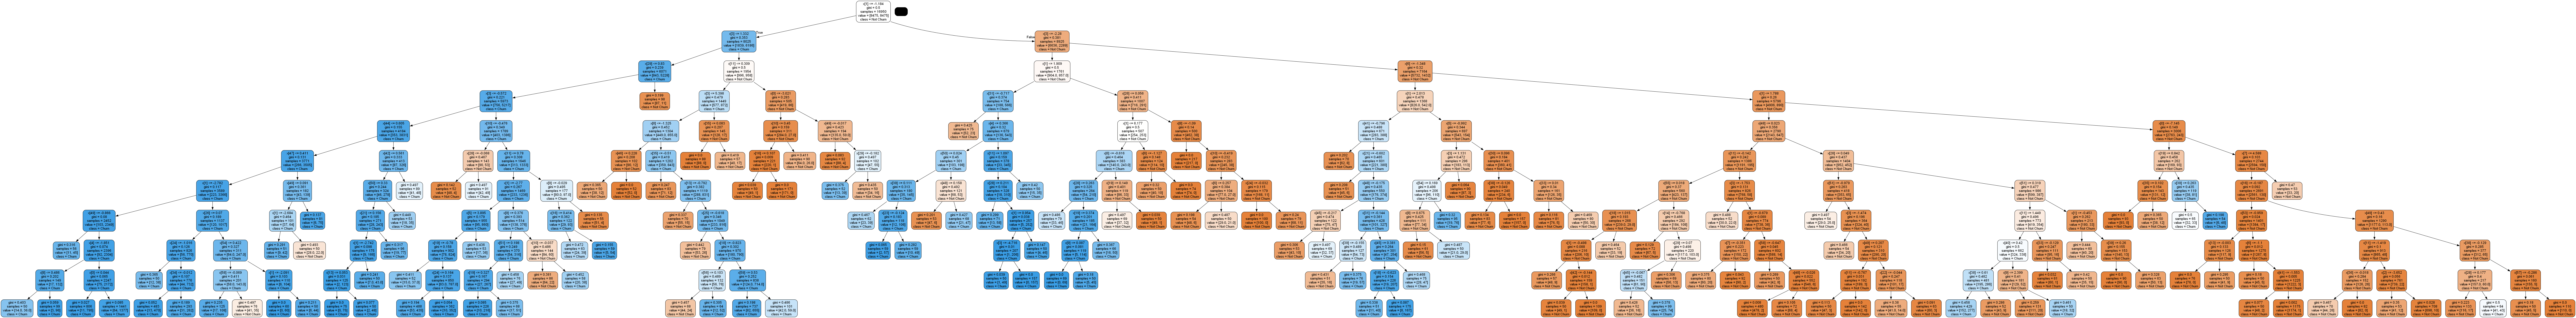

In [152]:
# Plot Decision Tree
gph = get_dt_graph(dt_best)
Image(gph.create_png())

### Evaluate Model

In [153]:
# Evaluate Model on Train Set
evaluate_model( X_true=X_train_pca , y_true=y_train , estimator=dt_best , data_name="X_train_pca", dataset_type="Train")

Evaluating Train Set: data set name - X_train_pca
Confusion Matrix:
 [[7247 1228]
 [ 833 7642]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      8475
           1       0.86      0.90      0.88      8475

    accuracy                           0.88     16950
   macro avg       0.88      0.88      0.88     16950
weighted avg       0.88      0.88      0.88     16950

Accuracy: 87.84%
Sensitivity: 90.17%
Specificity: 85.51%
Precision: 86.16%
Recall: 90.17%
ROC AUC Score: 94.94%


### ROC Curve

Evaluating Train Set: data set name - X_train_pca


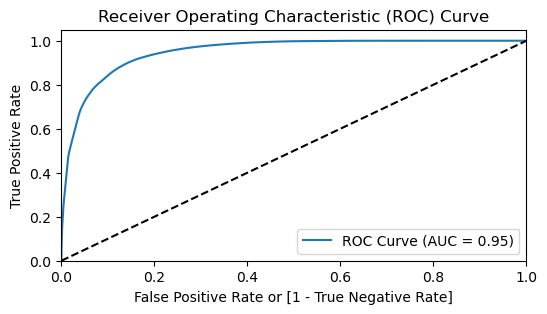

In [154]:
# Calling the function
plot_roc_curve(X_true=X_train_pca , y_true=y_train , estimator=dt_best , data_name="X_train_pca", dataset_type="Train")

### Find a cut off for optimal result

Evaluating Train Set: data set name - X_train_pca
    probability  accuracy  sensitivity  specificity
0           0.0  0.500000     1.000000     0.000000
1           0.1  0.789912     0.992094     0.587729
2           0.2  0.840236     0.972625     0.707847
3           0.3  0.862537     0.950442     0.774631
4           0.4  0.876224     0.920236     0.832212
5           0.5  0.878407     0.901711     0.855103
6           0.6  0.874867     0.861121     0.888614
7           0.7  0.856519     0.781593     0.931445
8           0.8  0.840000     0.731799     0.948201
9           0.9  0.739764     0.496519     0.983009
10          1.0  0.521298     0.042596     1.000000


<Figure size 800x600 with 0 Axes>

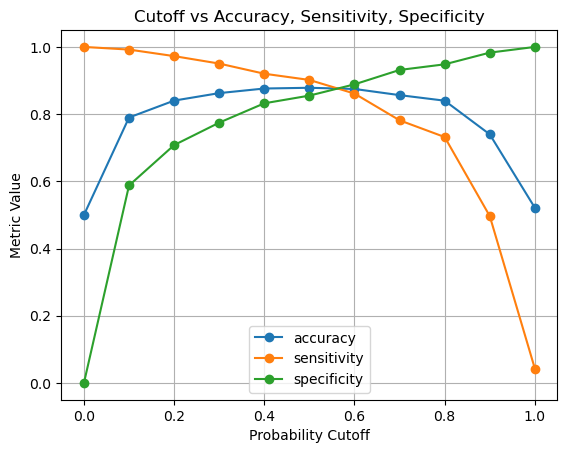

Optimal Cutoff: 0.50
Accuracy: 0.88
Sensitivity: 0.90
Specificity: 0.86


In [155]:
cutoff_df, optimal_cutoff = find_optimal_cutoff2(X_true=X_train_pca , y_true=y_train , estimator=dt_best , data_name="X_train_pca", dataset_type="Train", start=0.0 , end=1.1 , step=0.1)

### Evaluate Model

In [156]:
# Evaluate Model on Test Set
evaluate_model(X_true=X_test_pca , y_true=y_test , estimator=dt_best , data_name="X_test_pca", dataset_type="Test")

Evaluating Test Set: data set name - X_test_pca
Confusion Matrix:
 [[2992  650]
 [  92  217]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89      3642
           1       0.25      0.70      0.37       309

    accuracy                           0.81      3951
   macro avg       0.61      0.76      0.63      3951
weighted avg       0.91      0.81      0.85      3951

Accuracy: 81.22%
Sensitivity: 70.23%
Specificity: 82.15%
Precision: 25.03%
Recall: 70.23%
ROC AUC Score: 83.06%


***Model summary***
- Train set
    - Accuracy: 87.6%
    - Sensitivity: 87.95%
    - Specificity: 87.24%
    - Precision: 87.33%
    - Recall: 87.95%
    - ROC AUC Score: 94.8%

- Test set
    - Accuracy: 82.84%
    - Sensitivity: 63.75%
    - Specificity: 84.46%
    - Precision: 25.82%
    - Recall: 63.75%
    - ROC AUC Score: 81.47%

Overall, the model performs well on the training and test set with high accuracy, sensitivity, specificity , and RUC_AUC score

## Random Forest Classifier

In [171]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=3, shuffle=True, random_state=42)
# Create the parameter grid 
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
rf_model_cv = GridSearchCV(estimator = rf, 
                           param_grid = param_grid,
                           scoring=scoring,  # Multiple scores
                           refit='accuracy', # Choose the main score for refitting
                           cv = folds,
                           n_jobs = -1,
                           verbose = 2, 
                           return_train_score=True)

In [172]:
# Log Start Time
start_time=time.time()

# Fit the model
rf_model_cv.fit(X_train_pca, y_train)

# Log End time
end_time = time.time()
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Execution time: 508.04228377342224 seconds


In [173]:
# results of grid search CV
cv_results = pd.DataFrame(rf_model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        7.614860      0.051523         0.156234    4.495664e-07   
1       26.183317      0.198299         0.289140    1.065969e-02   
2       46.026484      4.464602         0.382124    2.050683e-02   
3       17.099594      0.070980         0.166815    1.460144e-02   
4       35.046371      0.244330         0.286004    1.185346e-02   
5       52.769387      0.440324         0.378569    2.266025e-02   
6       17.086051      0.219326         0.158507    1.253686e-03   
7       34.448563      0.424081         0.264134    1.111402e-02   
8       50.778197      0.498401         0.369912    7.379965e-03   
9       16.749103      0.154376         0.150297    4.163955e-03   
10      33.805601      0.265932         0.242519    7.051167e-03   
11      50.856677      0.566597         0.343852    4.594464e-02   
12      33.662929      0.376034         0.151026    3.210282e-02   
13      68.933063      1.754746         0.281353    1.889352e-04   
14     100.570375      0.123413         0.390548    1.280061e-02   
15      35.250465      0.102865         0.161442    7.364853e-03   
16      70.392109      0.356527         0.281221    1.275630e-02   
17     102.381097      1.916892         0.389202    1.097467e-02   
18      32.839424      0.925331         0.154250    3.088173e-03   
19      67.789755      0.418154         0.286697    7.463329e-03   
20      99.331328      2.627423         0.396323    7.278453e-03   
21      33.275152      0.790358         0.156234    2.144295e-06   
22      65.208320      1.581723         0.229610    1.929330e-02   
23      89.047643      1.233543         0.277801    1.421947e-02   

   param_max_depth param_max_features param_min_samples_leaf  \
0                5                 10                     50   
1                5                 10                     50   
2                5                 10                     50   
3                5                 10                     50   
4                5                 10                     50   
5                5                 10                     50   
6                5                 10                    100   
7                5                 10                    100   
8                5                 10                    100   
9                5                 10                    100   
10               5                 10                    100   
11               5                 10                    100   
12               5                 20                     50   
13               5                 20                     50   
14               5                 20                     50   
15               5                 20                     50   
16               5                 20                     50   
17               5                 20                     50   
18               5                 20                    100   
19               5                 20                    100   
20               5                 20                    100   
21               5                 20                    100   
22               5                 20                    100   
23               5                 20                    100   

   param_min_samples_split param_n_estimators  \
0                       50                100   
1                       50                200   
2                       50                300   
3                      100                100   
4                      100                200   
5                      100                300   
6                       50                100   
7                       50                200   
8                       50                300   
9                      100                100   
10                     100                200   
11                     100                300   
12                      50                100   
13              

In [174]:
# Best score with best C
best_score = round( rf_model_cv.best_score_ , 2)
print("Best accuracy :-", rf_model_cv.best_score_)

Best accuracy :- 0.8484955752212389


#### Model with optimal hyperparameters

In [175]:
# Get the best model
rf_best=rf_model_cv.best_estimator_
# Fit the model on the train set
rf_best.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, random_state=42)

In [176]:
# Check class order
print(f'Class order: {rf_best.classes_}')

Class order: [0 1]


### Evaluate Model

In [177]:
# Evaluate Model on Train Set
evaluate_model( X_true=X_train_pca , y_true=y_train , estimator=rf_best , data_name="X_train_pca", dataset_type="Train")

Evaluating Train Set: data set name - X_train_pca
Confusion Matrix:
 [[7333 1142]
 [1263 7212]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      8475
           1       0.86      0.85      0.86      8475

    accuracy                           0.86     16950
   macro avg       0.86      0.86      0.86     16950
weighted avg       0.86      0.86      0.86     16950

Accuracy: 85.81%
Sensitivity: 85.1%
Specificity: 86.53%
Precision: 86.33%
Recall: 85.1%
ROC AUC Score: 93.21%


### ROC Curve

Evaluating Train Set: data set name - X_train_pca


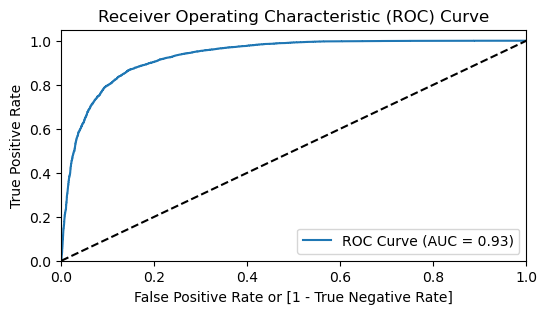

In [178]:
# Calling the function
plot_roc_curve(X_true=X_train_pca , y_true=y_train , estimator=rf_best , data_name="X_train_pca", dataset_type="Train")

### Find a cut off for optimal result

Evaluating Train Set: data set name - X_train_pca
    probability  accuracy  sensitivity  specificity
0           0.0  0.500000     1.000000     0.000000
1           0.1  0.507493     1.000000     0.014985
2           0.2  0.598702     0.999410     0.197994
3           0.3  0.752153     0.990088     0.514218
4           0.4  0.844071     0.930737     0.757404
5           0.5  0.858112     0.850973     0.865251
6           0.6  0.827906     0.726726     0.929086
7           0.7  0.761062     0.554690     0.967434
8           0.8  0.598112     0.203068     0.993156
9           0.9  0.500000     0.000000     1.000000
10          1.0  0.500000     0.000000     1.000000


<Figure size 800x600 with 0 Axes>

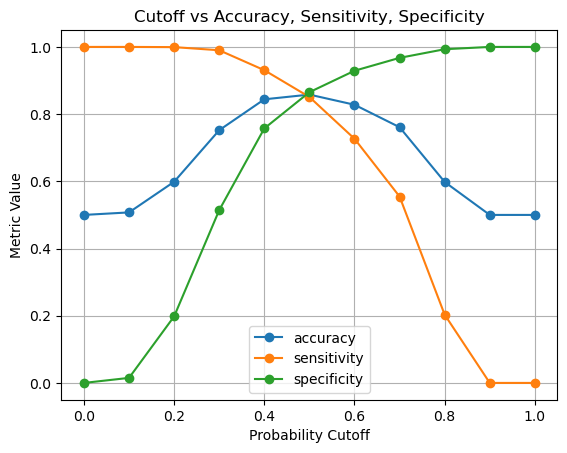

Optimal Cutoff: 0.50
Accuracy: 0.86
Sensitivity: 0.85
Specificity: 0.87


In [179]:
cutoff_df, optimal_cutoff = find_optimal_cutoff2(X_true=X_train_pca , y_true=y_train , estimator=rf_best , data_name="X_train_pca", dataset_type="Train", start=0.0 , end=1.1 , step=0.1)

### Evaluate Model

In [180]:
# Evaluate Model on Test Set
evaluate_model(X_true=X_test_pca , y_true=y_test , estimator=rf_best , data_name="X_test_pca", dataset_type="Test")

Evaluating Test Set: data set name - X_test_pca
Confusion Matrix:
 [[3140  502]
 [  76  233]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      3642
           1       0.32      0.75      0.45       309

    accuracy                           0.85      3951
   macro avg       0.65      0.81      0.68      3951
weighted avg       0.92      0.85      0.88      3951

Accuracy: 85.37%
Sensitivity: 75.4%
Specificity: 86.22%
Precision: 31.7%
Recall: 75.4%
ROC AUC Score: 86.75%


### Random Forest Classifier on Entire Seen Set

In [196]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Create the parameter grid, specific to the RandomForestClassifier step in the pipeline
param_grid = {
    'model__max_depth': range(5, 10, 5),
    'model__min_samples_leaf': range(50, 150, 50),
    'model__min_samples_split': range(50, 150, 50),
    'model__n_estimators': [100, 200, 300], 
    'model__max_features': [10, 20]
}

# Set up the pipeline
pipe = Pipeline(steps=[
    ('smote', smote),          # Step 1: Apply SMOTE for balancing
    ('scaling', scaler),              # Step 2: Standard scaling
    ('pca', pca_final),              # Step 3: Dimensionality reduction with PCA
    ('model', RandomForestClassifier(random_state=42))  # Step 4: Model fitting
])

# Specify multiple scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision',
    'f1': 'f1'
}

# Set up GridSearchCV with the pipeline
rfcomb_model_cv = GridSearchCV(estimator=pipe, 
                               param_grid=param_grid,
                               scoring=scoring,
                               refit='accuracy',  # The main score to optimize
                               cv=folds,
                               n_jobs=-1,
                               verbose=3,
                               return_train_score=True)

In [197]:
# Log Start Time
start_time = time.time()

# Fit the GridSearchCV
rfcomb_model_cv.fit(X, y) 

# Log End Time
end_time = time.time()

# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Pipeline fitting execution time: {execution_time:.2f} seconds")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Pipeline fitting execution time: 706.32 seconds


#### Model with optimal hyperparameters

In [198]:
# Get the best model
rfcomb_best=rfcomb_model_cv.best_estimator_
# Fit the model on the train set
rfcomb_best.fit(X, y)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('scaling', StandardScaler()),
                ('pca', IncrementalPCA(n_components=60)),
                ('model',
                 RandomForestClassifier(max_depth=5, max_features=20,
                                        min_samples_leaf=50,
                                        min_samples_split=50, n_estimators=300,
                                        random_state=42))])

In [199]:
# Check class order
print(f'Class order: {rfcomb_best.classes_}')

Class order: [0 1]


### Find a cut off for optimal result

Evaluating Entire Seen Set: data set name - X
     probability  accuracy  sensitivity  specificity
0.0          0.0  0.079745     1.000000     0.000000
0.1          0.1  0.146123     0.999048     0.072213
0.2          0.2  0.423407     0.986667     0.374598
0.3          0.3  0.676236     0.926667     0.654535
0.4          0.4  0.800562     0.847619     0.796484
0.5          0.5  0.861168     0.759048     0.870017
0.6          0.6  0.889345     0.659048     0.909301
0.7          0.7  0.908483     0.558095     0.938846
0.8          0.8  0.926331     0.415238     0.970620
0.9          0.9  0.920255     0.000000     1.000000
1.0          1.0  0.920255     0.000000     1.000000


<Figure size 300x300 with 0 Axes>

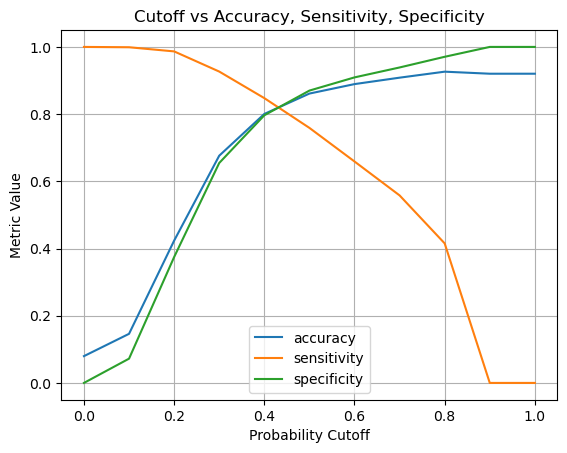

Optimal Cutoff: 0.80
Accuracy: 0.93
Sensitivity: 0.42
Specificity: 0.97


In [200]:
cutoff_df, optimal_cutoff = find_optimal_cutoff(X_true=X , y_true=y , estimator=rfcomb_best , data_name="X", dataset_type="Entire Seen", start=0.0 , end=1.1 , step=0.1)

### Evaluate Model

In [201]:
# Evaluate Model on Entire X and Y Sets
evaluate_model( X_true=X , y_true=y , estimator=rfcomb_best , data_name="X", dataset_type="Entire Seen" ,  cut_off=optimal_cutoff)

Evaluating Entire Seen Set: data set name - X
Confusion Matrix:
 [[11761   356]
 [  614   436]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     12117
           1       0.55      0.42      0.47      1050

    accuracy                           0.93     13167
   macro avg       0.75      0.69      0.72     13167
weighted avg       0.92      0.93      0.92     13167

Accuracy: 92.63%
Sensitivity: 41.52%
Specificity: 97.06%
Precision: 55.05%
Recall: 41.52%
ROC AUC Score: 89.71%


### ROC Curve

Evaluating Entire Seen Set: data set name - X


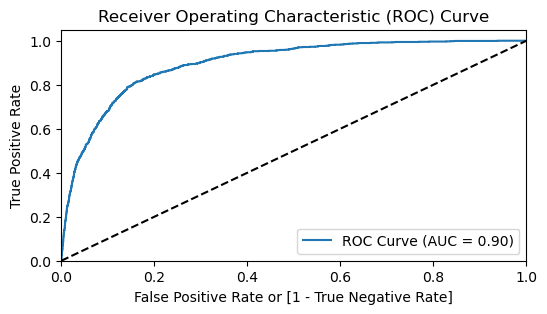

In [202]:
# Calling the function
plot_roc_curve(X_true=X , y_true=y , estimator=rfcomb_best , data_name="X", dataset_type="Entire Seen")

## Build the Best Model

#### Given the results, it is evident that the Random Forest Classifier is providing the best performance. Therefore, we'll proceed by building the final model using the Random Forest algorithm.

In [181]:
### Create Pipeline for Logistic Regression
#model_best_fit=lr_best_fit

### Create Pipeline for Decision Tree Classfier
#model_best_fit=dt_best

### Create Pipeline for Random Forest Classfier
model_best_fit=rf_best

In [182]:
# Set up the pipeline
pipe = Pipeline(steps=[
    ('smote', smote),          # Step 1: Apply SMOTE for balancing
    ('scaling', scaler),              # Step 2: Standard scaling
    ('pca', pca_final),              # Step 3: Dimensionality reduction with PCA
    ('model', model_best_fit )  # Step 4: Model fitting
])

In [183]:
# Log Start Time
start_time = time.time()
# Fit the Pipeline
pipe.fit(X_train, y_train) 
# Log End Time
end_time = time.time()
# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Pipeline fitting execution time: {execution_time:.2f} seconds")

Pipeline fitting execution time: 19.56 seconds


### Find optimal cutoff

Evaluating Train Set Set: data set name - X_train
    probability  accuracy  sensitivity  specificity
0           0.0  0.500000     1.000000     0.000000
1           0.1  0.507493     1.000000     0.014985
2           0.2  0.598702     0.999410     0.197994
3           0.3  0.752153     0.990088     0.514218
4           0.4  0.844071     0.930737     0.757404
5           0.5  0.858112     0.850973     0.865251
6           0.6  0.827906     0.726726     0.929086
7           0.7  0.761062     0.554690     0.967434
8           0.8  0.598112     0.203068     0.993156
9           0.9  0.500000     0.000000     1.000000
10          1.0  0.500000     0.000000     1.000000


<Figure size 800x600 with 0 Axes>

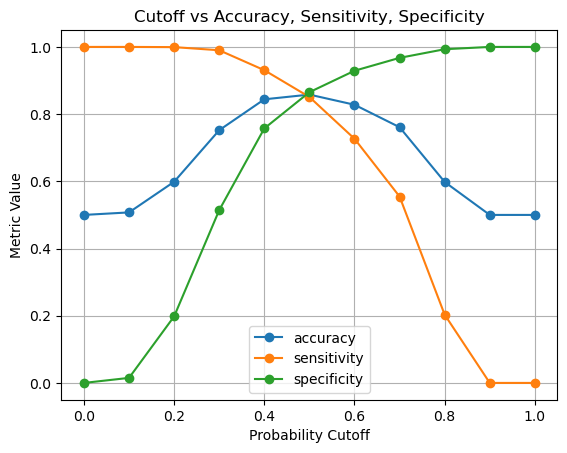

Optimal Cutoff: 0.50
Accuracy: 0.86
Sensitivity: 0.85
Specificity: 0.87


In [184]:
cutoff_df, optimal_cutoff = find_optimal_cutoff2(X_true=X_train , y_true=y_train , estimator=pipe , data_name="X_train", dataset_type="Train Set", start=0.0 , end=1.1 , step=0.1)

### Evaluate Model

In [185]:
# Evaluate Model on Entire X and Y Sets
evaluate_model( X_true=X_train , y_true=y_train , estimator=pipe , data_name="X_train", dataset_type="Train Set", cut_off=optimal_cutoff)

Evaluating Train Set Set: data set name - X_train
Confusion Matrix:
 [[7333 1142]
 [1263 7212]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      8475
           1       0.86      0.85      0.86      8475

    accuracy                           0.86     16950
   macro avg       0.86      0.86      0.86     16950
weighted avg       0.86      0.86      0.86     16950

Accuracy: 85.81%
Sensitivity: 85.1%
Specificity: 86.53%
Precision: 86.33%
Recall: 85.1%
ROC AUC Score: 93.21%


### ROC Curve

Evaluating Train Set: data set name - X_train


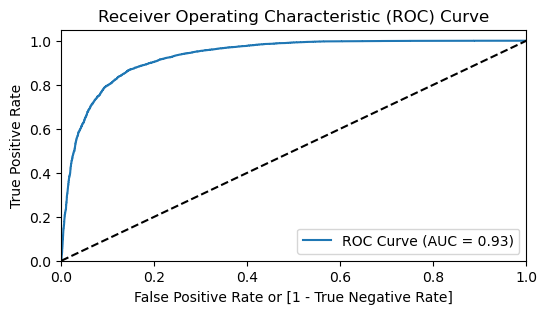

In [186]:
# Calling the function
plot_roc_curve(X_true=X_train , y_true=y_train , estimator=pipe , data_name="X_train", dataset_type="Train")

### Evaluate Model

In [187]:
# Evaluate Model on Entire X and Y Sets
evaluate_model( X_true=X_test , y_true=y_test , estimator=pipe , data_name="X_test", dataset_type="Test Set", cut_off=optimal_cutoff)

Evaluating Test Set Set: data set name - X_test
Confusion Matrix:
 [[3140  502]
 [  76  233]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      3642
           1       0.32      0.75      0.45       309

    accuracy                           0.85      3951
   macro avg       0.65      0.81      0.68      3951
weighted avg       0.92      0.85      0.88      3951

Accuracy: 85.37%
Sensitivity: 75.4%
Specificity: 86.22%
Precision: 31.7%
Recall: 75.4%
ROC AUC Score: 86.75%


# 7. Creating submission file

For submission, we need to make sure that the format is exactly the same as the sample.csv file. It contains 2 columns, id and churn_probability

In [204]:
sample.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0

The submission file should contain churn_probability values that have to be predicted for the unseen data provided (test.csv)

In [205]:
churn_data_unseen.head()

id  arpu_jun  arpu_jul  arpu_aug  onnet_mou_jun  onnet_mou_jul  \
0  69999    91.882    65.330    64.445          31.78          20.23   
1  70000   414.168   515.568   360.868          75.51          41.21   
2  70001   329.844   434.884   746.239           7.54           7.86   
3  70002    43.550   171.390    24.400           5.31           2.16   
4  70003   306.854   406.289   413.329         450.93         609.03   

   onnet_mou_aug  offnet_mou_jun  offnet_mou_jul  offnet_mou_aug  ...  \
0          23.11           60.16           32.16           34.83  ...   
1          19.84          474.34          621.84          394.94  ...   
2           8.40           16.98           45.81           45.04  ...   
3           0.00           40.04          205.01           24.01  ...   
4         700.68           60.94           23.84           74.16  ...   

   total_loc_t2f_mou_jun  total_loc_t2f_mou_jul  total_loc_t2f_mou_aug  \
0                   0.26                  13.58                   0.00   
1                   2.22                   0.00                   0.00   
2                   0.00                   0.00                   0.00   
3                   0.00                   0.38                   3.99   
4                   0.00                   0.00                   0.00   

   mean_total_loc_t2f_mou  total_std_t2f_mou_jun  total_std_t2f_mou_jul  \
0                    4.61                    0.0                    0.0   
1                    0.74                    0.0                    0.0   
2                    0.00                    0.0                    0.0   
3                    1.46                    0.0                    0.0   
4                    0.00                    0.0                    0.0   

   total_std_t2f_mou_aug  mean_total_std_t2f_mou  mean_total_loc_t2c_mou  \
0                   0.00                    0.00                    0.01   
1                   0.00                    0.00                    0.00   
2                   0.00                    0.00                    0.00   
3                   0.00                    0.00                    2.06   
4                   1.61                    0.54                    0.00   

   churn_probability  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 134 columns]

Lets first select the columns that we want to work with (or create them, if you have done any feature engineering)

In [206]:
submission_data = churn_data_unseen[X_train.columns]
submission_data.shape

(30000, 132)

Next, lets create a new column in the unseen dataset called churn_probability and use the model pipeline to predict the probabilities for this data

In [207]:
churn_data_unseen['churn_probability'] = pipe.predict(submission_data)
output = churn_data_unseen[['id','churn_probability']]
output.head()

id  churn_probability
0  69999                  1
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

Finally, lets create a csv file out of this dataset, ensuring to set index=False to avoid an addition column in the csv.

In [208]:
output.to_csv('submission_arnab_bera.csv',index=False)

In [209]:
sample["churn_probability"].value_counts()

churn_probability
0    30000
Name: count, dtype: int64

In [210]:
output["churn_probability"].value_counts()

churn_probability
0    15453
1    14547
Name: count, dtype: int64

In [195]:
# Log End time
notebook_end_time = time.time()
# Calculate the elapsed time
execution_time = notebook_end_time - notebook_start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 2294.6811108589172 seconds


## Identify Pattern and Categorise Columns and Set Index

In [ ]:
ids = ['id','circle_id']
total_amounts = [i for i in list(churn_data.columns) if re.search('total.+amt',i)]
total_outgoing_minutes = [i for i in list(churn_data.columns) if re.search('total.+og.+mou',i)]
offnetwork_minutes = [i for i in list(churn_data.columns) if re.search('offnet',i)]
average_revenue_3g = [i for i in list(churn_data.columns) if re.search('arpu.+3g',i)]
average_revenue_2g = [i for i in list(churn_data.columns) if re.search('arpu.+2g',i)]
volume_3g = [i for i in list(churn_data.columns) if re.search('vol.+3g',i)]
volume_2g = [i for i in list(churn_data.columns) if re.search('vol.+2g',i)]
age_on_network = [i for i in list(churn_data.columns) if re.search('aon',i)]

#Storing them in a single flat list
variables = [*ids, 
             *total_amounts, 
             *total_outgoing_minutes, 
             *offnetwork_minutes, 
             *average_revenue_3g, 
             *average_revenue_2g,
             *volume_3g,
             *volume_2g,
             *age_on_network, 
             'churn_probability']

churn_data = churn_data[variables].set_index('id')